In [1]:
import ROOT
from array import array

Welcome to JupyROOT 6.26/04


## Definizione funzioni

In [2]:
def get_mean_rms(tree, leaf, selection):
    #print(selection)
    tree.Draw(leaf, selection)
    htemp = ROOT.TH1F(ROOT.gPad.GetPrimitive("htemp"))
    mean = htemp.GetMean()
    rms = htemp.GetRMS()
    return mean, rms

In [3]:
def make_graph(entries, x_array, y_array, name, title, x_title, y_title, color, style = 20):
    graph = ROOT.TGraph(entries, x_array, y_array)
    graph.SetNameTitle(name, title)
    graph.GetXaxis().SetTitle(x_title)
    graph.GetYaxis().SetTitle(y_title)
    graph.SetMarkerColor(color)
    graph.SetMarkerStyle(style)
    return graph
ROOT.TGaxis.SetMaxDigits(3) 

In [4]:
def make_graph_err(entries, x_array, err_x_array, y_array, err_y_array, name, title, x_title, y_title, color, style = 20):
    graph = ROOT.TGraphErrors(entries, x_array, y_array, err_x_array, err_y_array)
    graph.SetNameTitle(name, title)
    graph.GetXaxis().SetTitle(x_title)
    graph.GetYaxis().SetTitle(y_title)
    graph.SetMarkerColor(color)
    graph.SetMarkerStyle(style)
    return graph
ROOT.TGaxis.SetMaxDigits(3) 

## Inizio analisi

In [5]:
#infile = ROOT.TFile.Open("InBodyExcelData_2022-04-06_16-10-52_ridotto_con_visite.root")
infile = ROOT.TFile.Open("InBodyExcelData_2022-09-08_18-03-19_ridotto_ML_new.root")


In [6]:
tree = infile.Get("t1")

In [12]:
for entry in tree:
    if entry.Local_ID == 42  and entry.nr_visite == 0:
        print(entry.Height)

106.0


In [7]:
#tree.Print()
#import os
#if not os.path.exists("GNAM_results.root"):
#    fout = ROOT.TFile.Open("GNAM_results.root", "RECREATE")
#else:
#    fout = ROOT.TFile.Open("GNAM_results.root", "UPDATE")

In [10]:
tree.Print()

******************************************************************************
*Tree    :t1        : t1                                                     *
*Entries :     9080 : Total =         2070461 bytes  File  Size =     801365 *
*        :          : Tree compression factor =   2.56                       *
******************************************************************************
*Br    0 :Local_ID  : Local_ID/I                                             *
*Entries :     9080 : Total  Size=      36963 bytes  File Size  =       8102 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   4.50     *
*............................................................................*
*Br    1 :Gender    : Gender/I                                               *
*Entries :     9080 : Total  Size=      36951 bytes  File Size  =       2006 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=  18.18     *
*...................................................

In [8]:
#ROOT.gStyle.SetOptStat()
ROOT.gStyle.SetOptFit(1)
#ROOT.gStyle.SetLabelFont(72)
ROOT.gStyle.SetLabelSize(0.05, "XYZ")
ROOT.gStyle.SetTitleXSize(0.05)
ROOT.gStyle.SetTitleYSize(0.05)

In [9]:
gender = 1 #donne
fout.mkdir("Donne/")
fout.cd("Donne/")

True

# Indice di bontà con BMI medio di riferimento

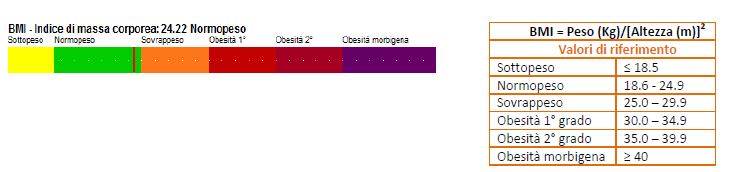

In [10]:
xmin = 0
xmax = 500
xbin = 10

ymin = 5
ymax = 65
ybin = 70

xlabel = '#Delta days'

h_clstA_BMInvis = ROOT.TH2F('h_clstA_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_BMInvis = ROOT.TH2F('h_clstB_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_BMInvis = ROOT.TH2F('h_clstC_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_BMInvis = ROOT.TH2F('h_clstD_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_BMInvis = ROOT.TH2F('h_clstE_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_BMInvis = ROOT.TH2F('h_clstF_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_BMInvis = ROOT.TH2F('h_clstG_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_BMInvis = ROOT.TH2F('h_clstH_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_BMInvis = ROOT.TH2F('h_clstI_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_BMInvis = ROOT.TH2F('h_clstL_BMInvis', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 3):
        h_clstC_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 4):
        h_clstD_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 5):
        h_clstE_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 6):
        h_clstF_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 7):
        h_clstG_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 8):
        h_clstH_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 9):
        h_clstI_BMInvis.Fill( tree.DeltaDays, tree.BMI)
    if(cluster == 10):
        h_clstL_BMInvis.Fill( tree.DeltaDays, tree.BMI)


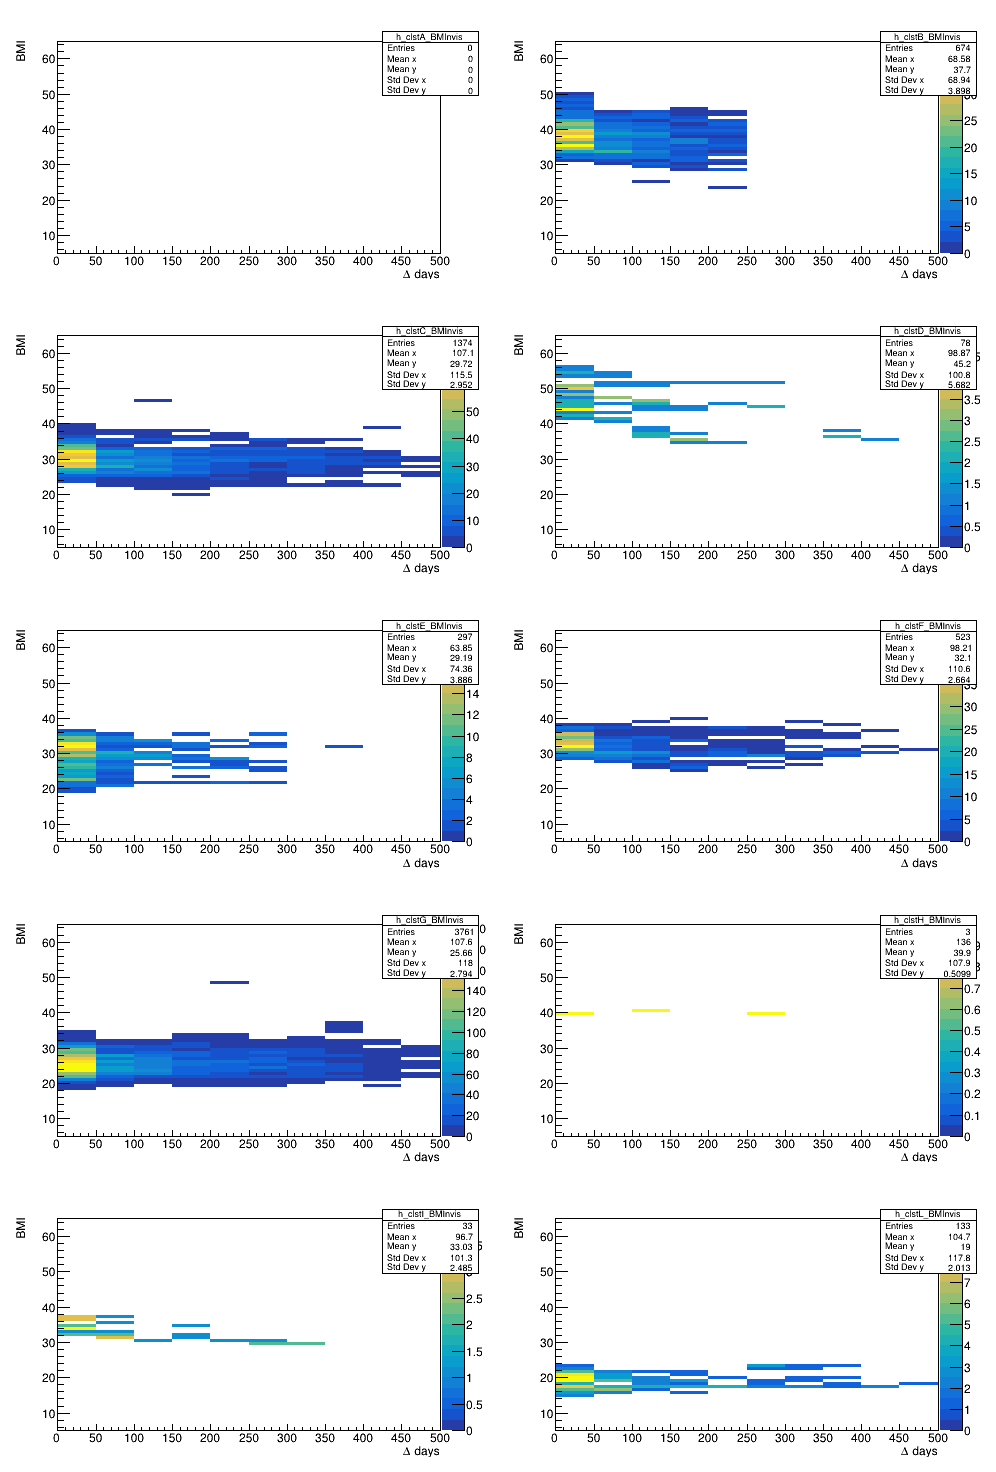

In [11]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_BMInvis.Draw("COLZ")
c1.cd(2)
h_clstB_BMInvis.Draw("COLZ")
c1.cd(3)
h_clstC_BMInvis.Draw("COLZ")
c1.cd(4)
h_clstD_BMInvis.Draw("COLZ")
c1.cd(5)
h_clstE_BMInvis.Draw("COLZ")
c1.cd(6)
h_clstF_BMInvis.Draw("COLZ")
c1.cd(7)
h_clstG_BMInvis.Draw("COLZ")
c1.cd(8)
h_clstH_BMInvis.Draw("COLZ")
c1.cd(9)
h_clstI_BMInvis.Draw("COLZ")
c1.cd(10)
h_clstL_BMInvis.Draw("COLZ")
c1.Draw()


****************************************
         Invalid FitResult  (status = 1 )
****************************************
Minimizer is Linear / Migrad
Chi2                      =            0
NDf                       =            0
p0                        =            1
p1                        =            1

****************************************
Minimizer is Linear / Migrad
Chi2                      =      32.0437
NDf                       =            8
p0                        =      30.0827   +/-   0.105864    
p1                        =  -0.00280336   +/-   0.000671489 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      19.1848
NDf                       =            5
p0                        =      48.5562   +/-   0.643681    
p1                        =   -0.0306273   +/-   0.00223249  

****************************************
Minimizer is Linear / Migrad
Chi2                      =      4.39247
NDf             

Warning in <Fit>: Fit data is empty 
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Warning in <Minimize>: TLinearFitter failed in finding the solution
Warning in <Fit>: Abnormal termination of minimization.
Warning in <Fit>: Fit data is empty 


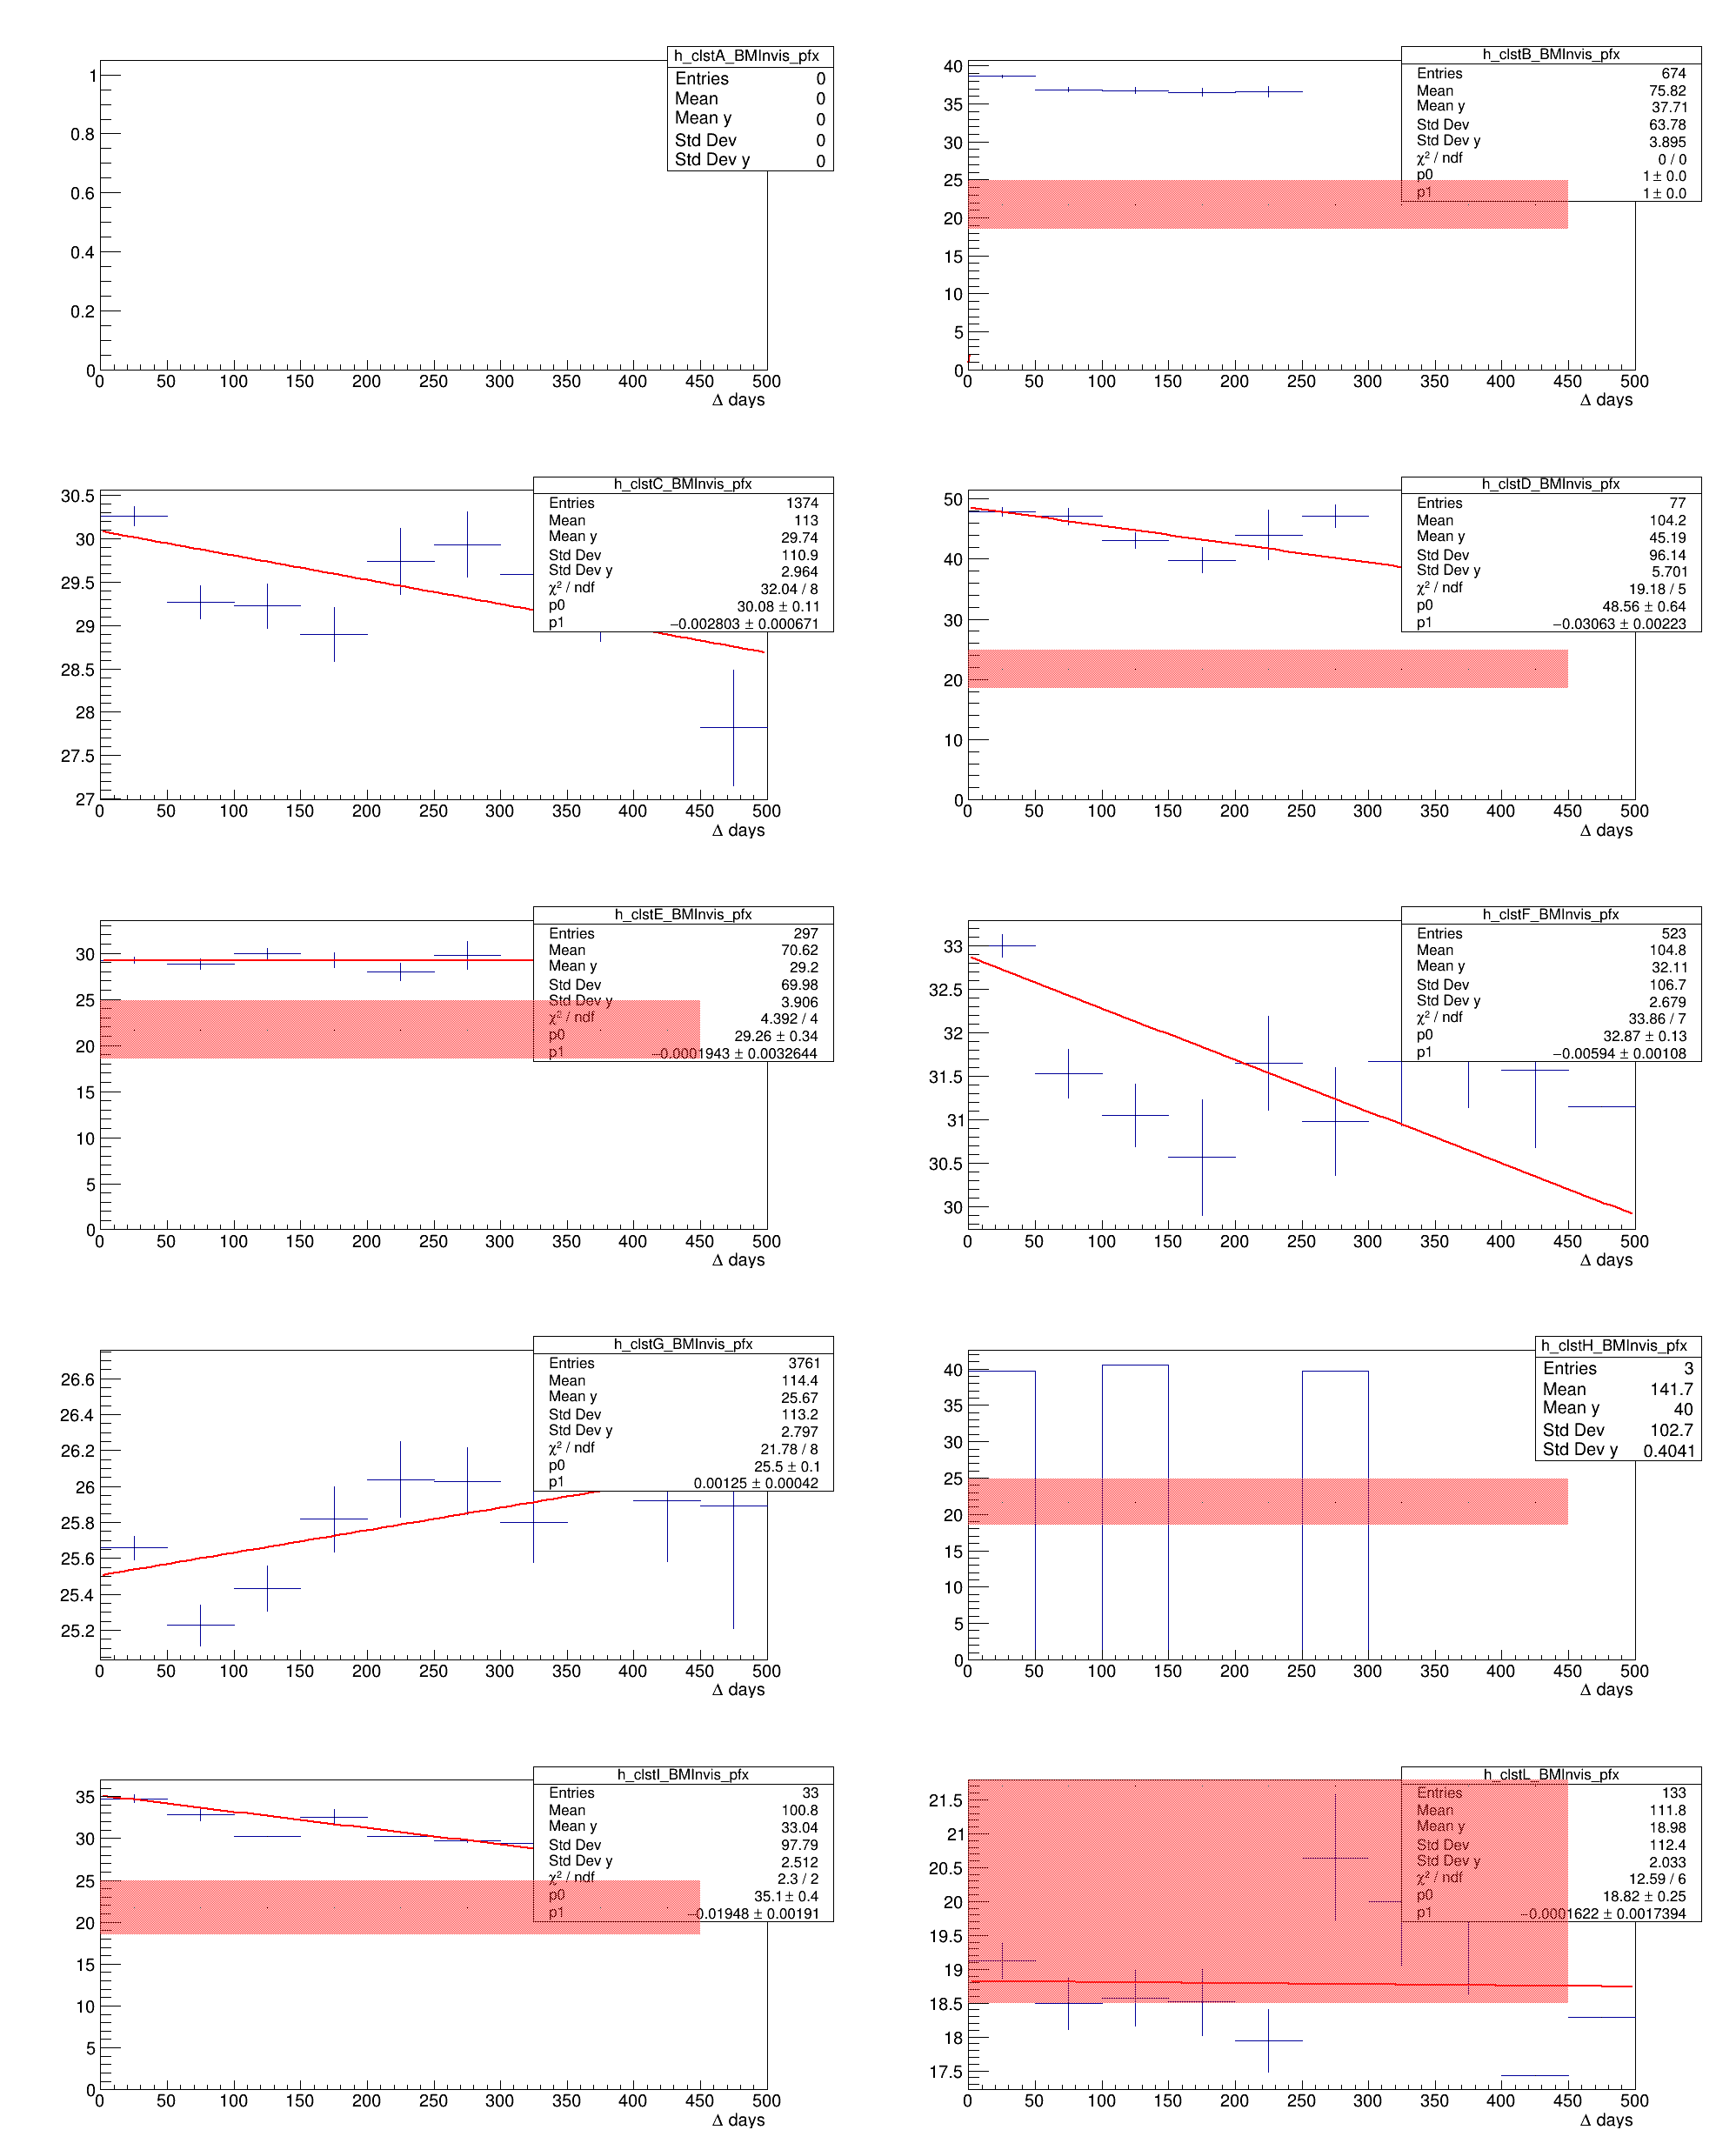

In [12]:
h_ref = ROOT.TH1F('', '; n. visita; BMI', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (24.9 + 18.5)/2)
    h_ref.SetBinError(i, (24.9 - 18.5)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 2000, 2500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_BMInvis.ProfileX().Draw()
h_clstA_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_BMInvis.ProfileX().Draw()
#f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_BMInvis.ProfileX().Fit("pol1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_BMInvis.ProfileX().Draw()
h_clstC_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_BMInvis.ProfileX().Draw()
h_clstD_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_BMInvis.ProfileX().Draw()
h_clstE_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_BMInvis.ProfileX().Draw()
h_clstF_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_BMInvis.ProfileX().Draw()
h_clstG_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_BMInvis.ProfileX().Draw()
h_clstH_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_BMInvis.ProfileX().Draw()
h_clstI_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_BMInvis.ProfileX().Draw("SAME")
h_clstL_BMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con WHR medio di riferimento

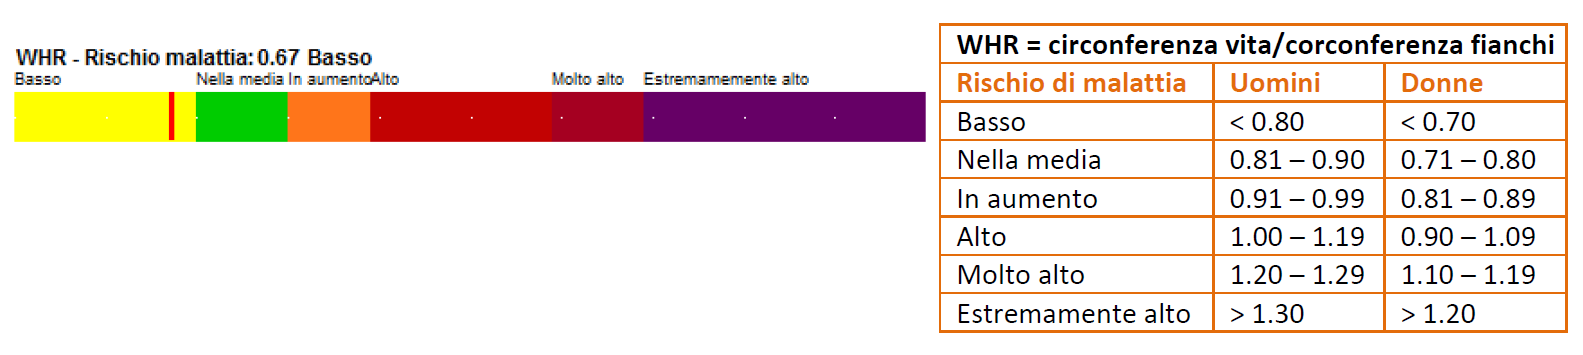

In [14]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0.5
ymax = 1.4
ybin = 90

xlabel = '#Delta days'

h_clstA_WHRnvis = ROOT.TH2F('h_clstA_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_WHRnvis = ROOT.TH2F('h_clstB_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_WHRnvis = ROOT.TH2F('h_clstC_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_WHRnvis = ROOT.TH2F('h_clstD_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_WHRnvis = ROOT.TH2F('h_clstE_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_WHRnvis = ROOT.TH2F('h_clstF_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_WHRnvis = ROOT.TH2F('h_clstG_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_WHRnvis = ROOT.TH2F('h_clstH_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_WHRnvis = ROOT.TH2F('h_clstI_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_WHRnvis = ROOT.TH2F('h_clstL_WHRnvis', '; ' + xlabel + '; WHR', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 3):
        h_clstC_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 4):
        h_clstD_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 5):
        h_clstE_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 6):
        h_clstF_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 7):
        h_clstG_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 8):
        h_clstH_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 9):
        h_clstI_WHRnvis.Fill( tree.DeltaDays, tree.WHR)
    if(cluster == 10):
        h_clstL_WHRnvis.Fill( tree.DeltaDays, tree.WHR)


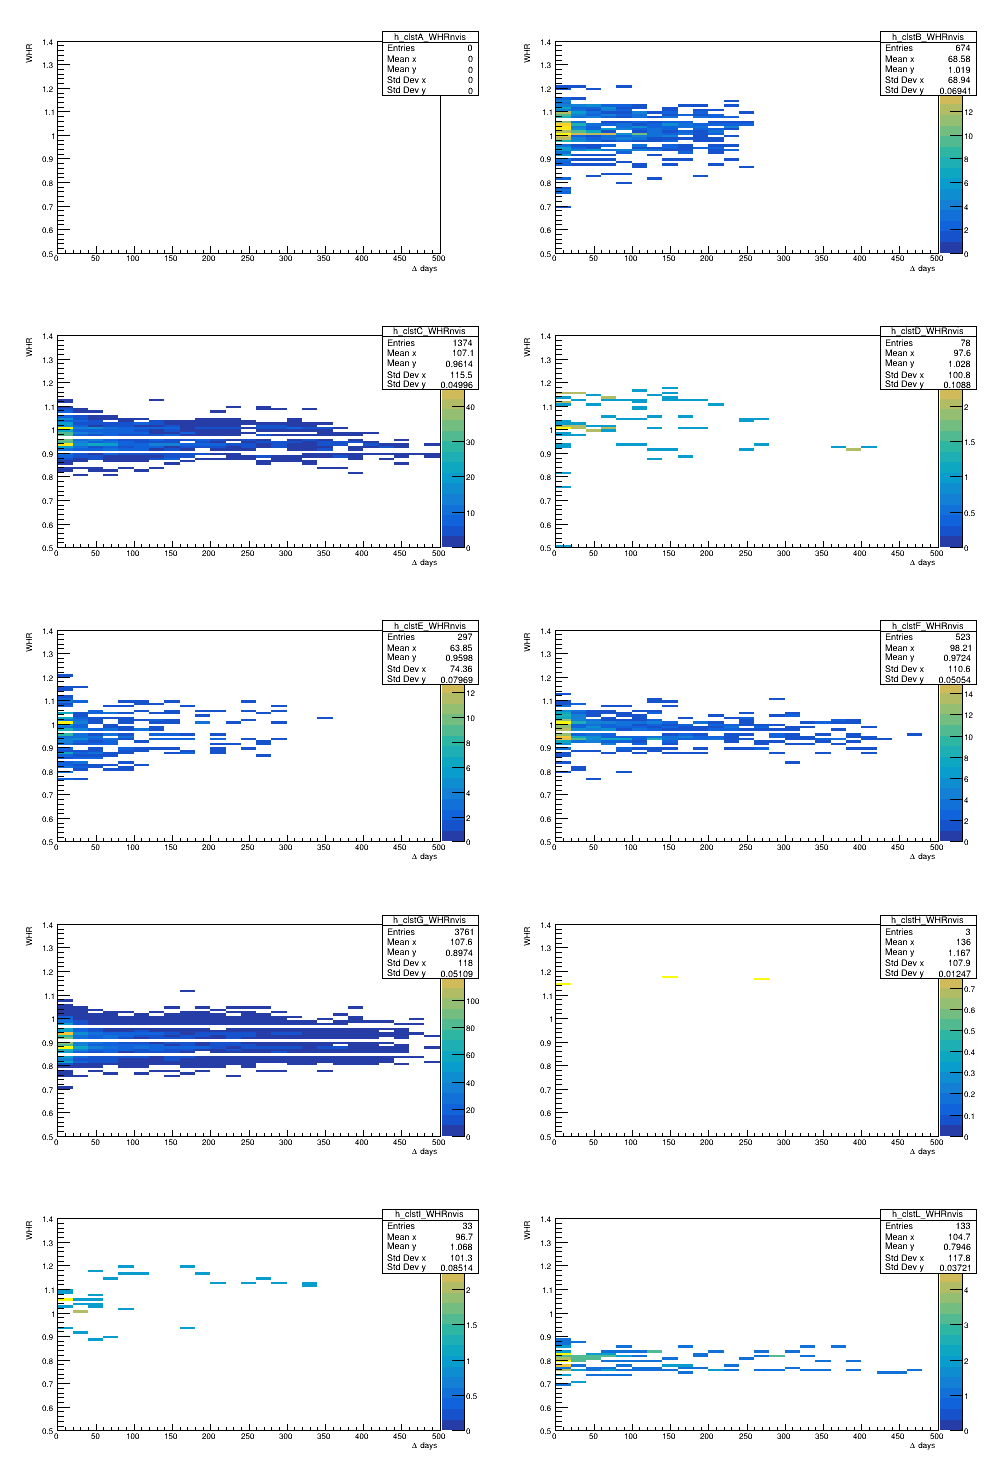

In [15]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_WHRnvis.Draw("COLZ")
c1.cd(2)
h_clstB_WHRnvis.Draw("COLZ")
c1.cd(3)
h_clstC_WHRnvis.Draw("COLZ")
c1.cd(4)
h_clstD_WHRnvis.Draw("COLZ")
c1.cd(5)
h_clstE_WHRnvis.Draw("COLZ")
c1.cd(6)
h_clstF_WHRnvis.Draw("COLZ")
c1.cd(7)
h_clstG_WHRnvis.Draw("COLZ")
c1.cd(8)
h_clstH_WHRnvis.Draw("COLZ")
c1.cd(9)
h_clstI_WHRnvis.Draw("COLZ")
c1.cd(10)
h_clstL_WHRnvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =       8.8754
NDf                       =           11
p0                        =      1.02126   +/-   0.00410328  
p1                        = -3.48589e-05   +/-   3.83385e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      49.5606
NDf                       =           22
p0                        =     0.970385   +/-   0.0017431   
p1                        = -9.54515e-05   +/-   9.63485e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      11.5594
NDf                       =           10
p0                        =      1.05623   +/-   0.0152385   
p1                        = -0.000125177   +/-   0.00011969  

****************************************
Minimizer is Linear / Migrad
Chi2                      =      41.9231
NDf                       =           13
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


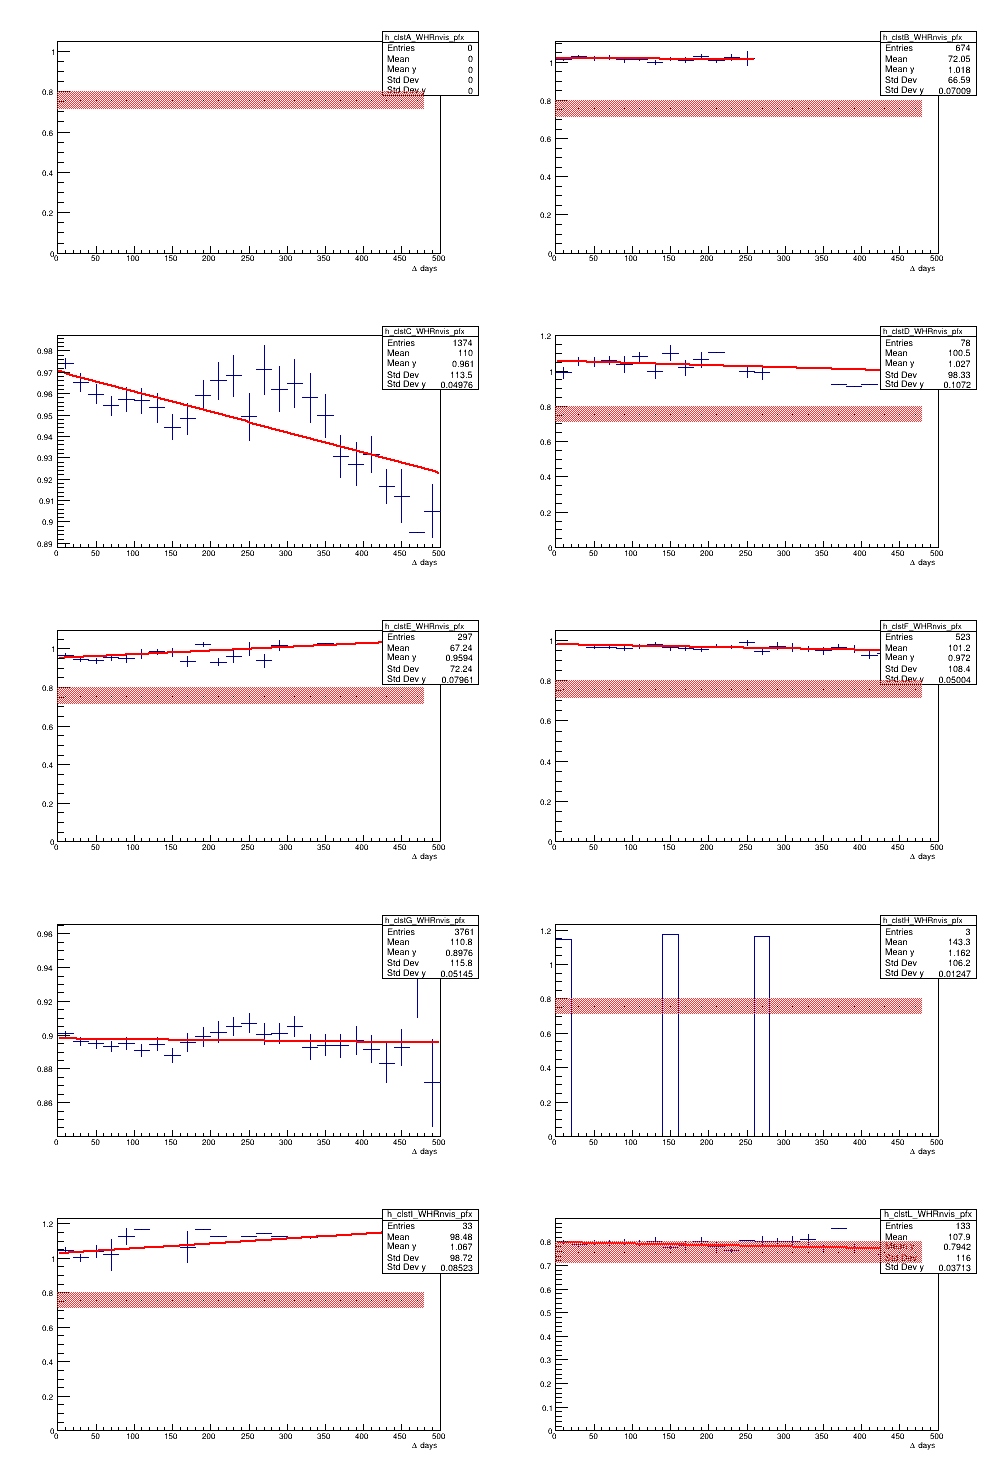

In [16]:
h_ref = ROOT.TH1F('', '; n. visita; WHR', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (0.8 + 0.71)/2)
    h_ref.SetBinError(i, (0.8 - 0.71)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_WHRnvis.ProfileX().Draw()
h_clstA_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_WHRnvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_WHRnvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_WHRnvis.ProfileX().Draw()
h_clstC_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_WHRnvis.ProfileX().Draw()
h_clstD_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_WHRnvis.ProfileX().Draw()
h_clstE_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_WHRnvis.ProfileX().Draw()
h_clstF_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_WHRnvis.ProfileX().Draw()
h_clstG_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_WHRnvis.ProfileX().Draw()
h_clstH_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_WHRnvis.ProfileX().Draw()
h_clstI_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_WHRnvis.ProfileX().Draw("SAME")
h_clstL_WHRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con FFM medio di riferimento

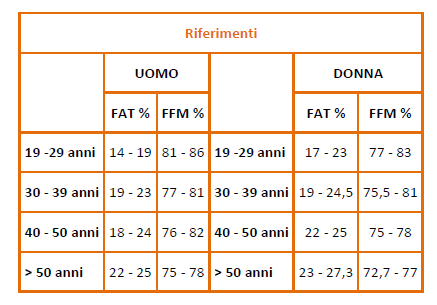

In [17]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0
ymax = 1
ybin = 100

xlabel = '#Delta days'

h_clstA_FFMnvis = ROOT.TH2F('h_clstA_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_FFMnvis = ROOT.TH2F('h_clstB_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_FFMnvis = ROOT.TH2F('h_clstC_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_FFMnvis = ROOT.TH2F('h_clstD_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_FFMnvis = ROOT.TH2F('h_clstE_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_FFMnvis = ROOT.TH2F('h_clstF_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_FFMnvis = ROOT.TH2F('h_clstG_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_FFMnvis = ROOT.TH2F('h_clstH_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_FFMnvis = ROOT.TH2F('h_clstI_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_FFMnvis = ROOT.TH2F('h_clstL_FFMnvis', '; ' + xlabel + '; FFM', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 2 ): # and tree.DeltaDays<250):
        h_clstB_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 3):
        h_clstC_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 4):
        h_clstD_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 5):
        h_clstE_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 6):
        h_clstF_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 7):
        h_clstG_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 8):
        h_clstH_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 9):
        h_clstI_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)
    if(cluster == 10):
        h_clstL_FFMnvis.Fill( tree.DeltaDays, tree.FFM/tree.Weight)


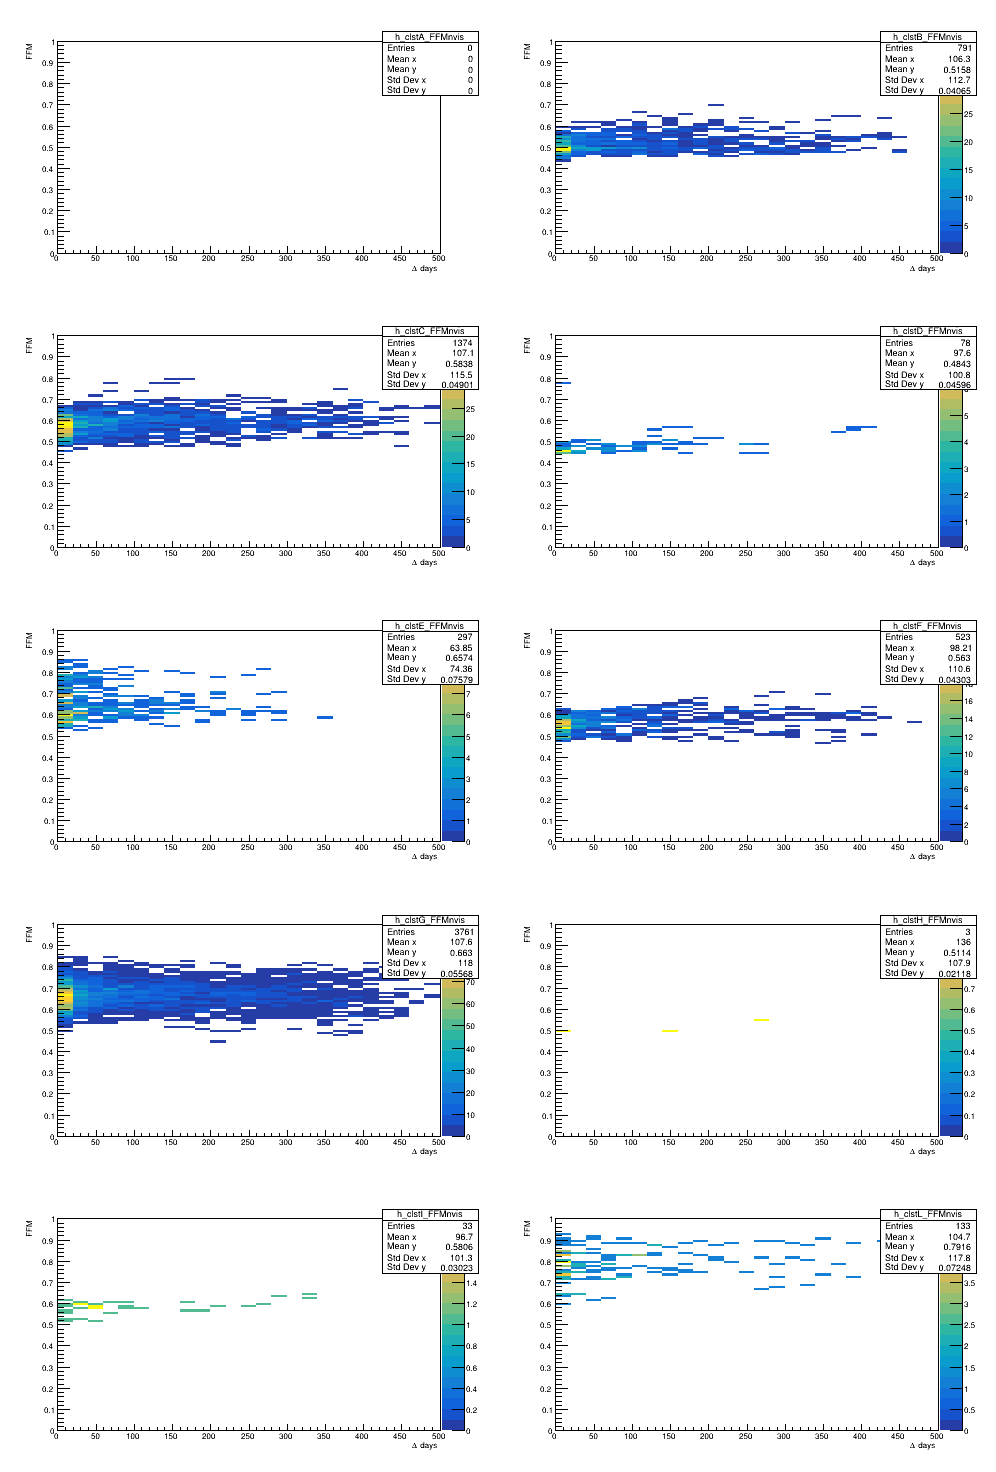

In [18]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_FFMnvis.Draw("COLZ")
c1.cd(2)
h_clstB_FFMnvis.Draw("COLZ")
c1.cd(3)
h_clstC_FFMnvis.Draw("COLZ")
c1.cd(4)
h_clstD_FFMnvis.Draw("COLZ")
c1.cd(5)
h_clstE_FFMnvis.Draw("COLZ")
c1.cd(6)
h_clstF_FFMnvis.Draw("COLZ")
c1.cd(7)
h_clstG_FFMnvis.Draw("COLZ")
c1.cd(8)
h_clstH_FFMnvis.Draw("COLZ")
c1.cd(9)
h_clstI_FFMnvis.Draw("COLZ")
c1.cd(10)
h_clstL_FFMnvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      19.0628
NDf                       =           11
p0                        =     0.503438   +/-   0.00184926  
p1                        =  0.000152104   +/-   2.26071e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      52.3113
NDf                       =           22
p0                        =     0.572345   +/-   0.00163746  
p1                        =  9.04443e-05   +/-   1.02515e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      55.9552
NDf                       =           11
p0                        =     0.450659   +/-   0.00314829  
p1                        =  0.000265574   +/-   1.35246e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      26.9324
NDf                       =           12
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


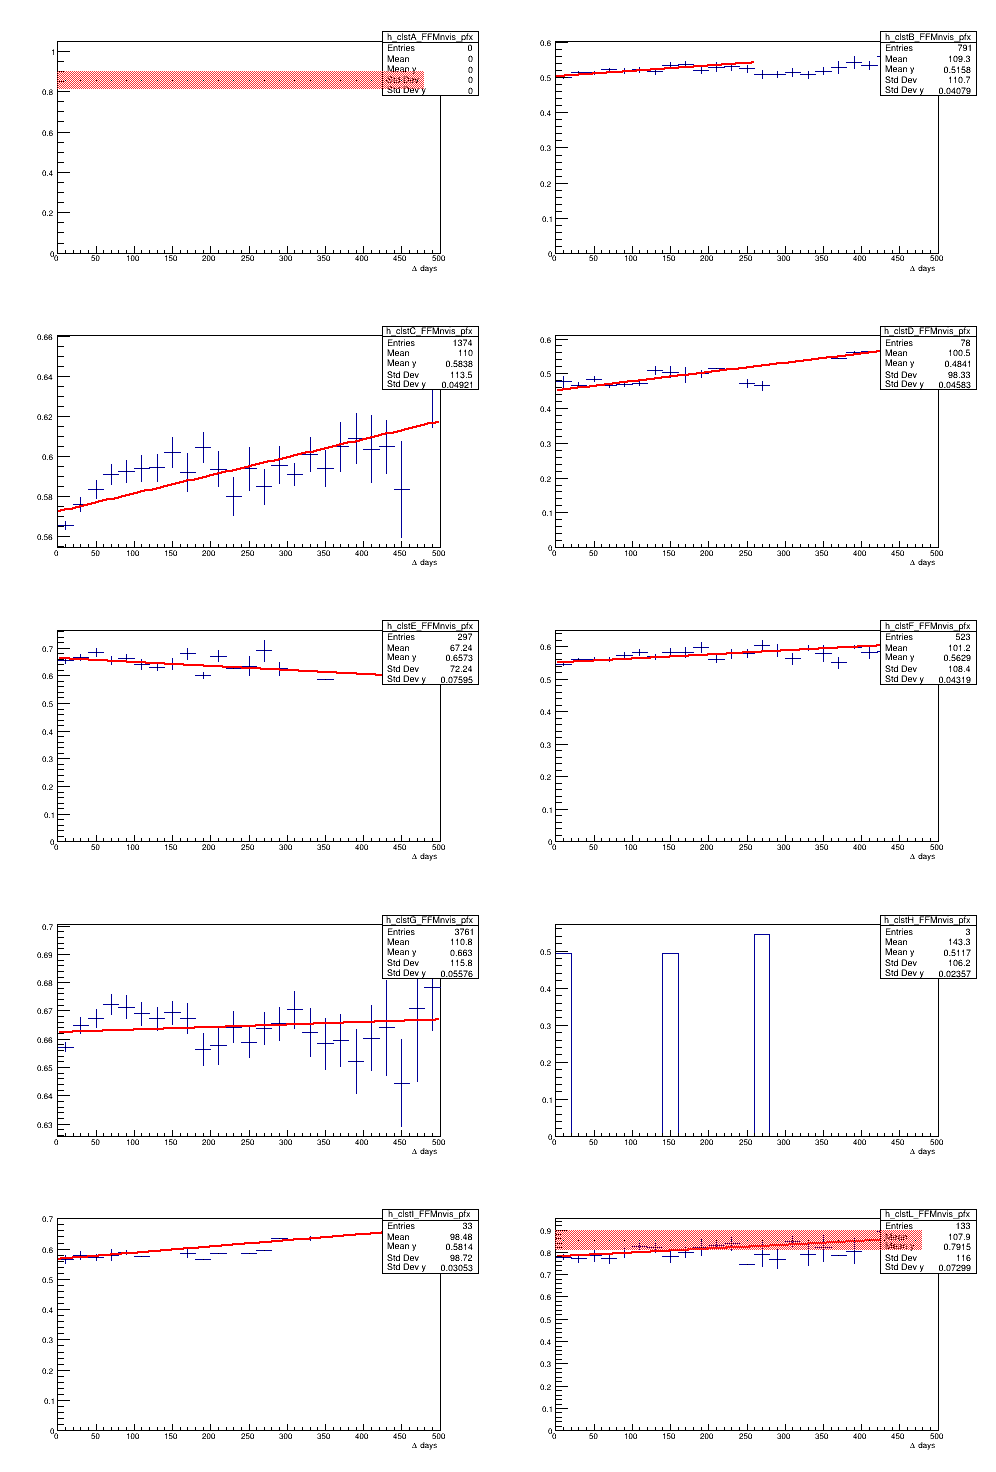

In [19]:
h_ref = ROOT.TH1F('', '; n. visita; FFM', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (0.9 + 0.81)/2)
    h_ref.SetBinError(i, (0.9 - 0.81)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_FFMnvis.ProfileX().Draw()
h_clstA_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_FFMnvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_FFMnvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_FFMnvis.ProfileX().Draw()
h_clstC_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_FFMnvis.ProfileX().Draw()
h_clstD_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_FFMnvis.ProfileX().Draw()
h_clstE_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_FFMnvis.ProfileX().Draw()
h_clstF_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_FFMnvis.ProfileX().Draw()
h_clstG_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_FFMnvis.ProfileX().Draw()
h_clstH_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_FFMnvis.ProfileX().Draw()
h_clstI_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_FFMnvis.ProfileX().Draw("SAME")
h_clstL_FFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con BFM medio di riferimento

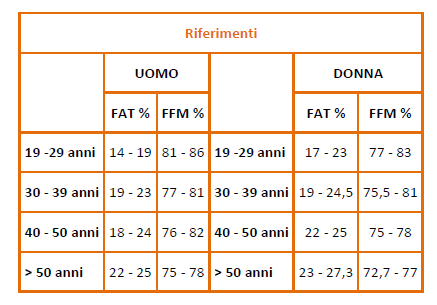

In [20]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0
ymax = 1
ybin = 100

xlabel = '#Delta days'

h_clstA_BFMnvis = ROOT.TH2F('h_clstA_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_BFMnvis = ROOT.TH2F('h_clstB_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_BFMnvis = ROOT.TH2F('h_clstC_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_BFMnvis = ROOT.TH2F('h_clstD_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_BFMnvis = ROOT.TH2F('h_clstE_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_BFMnvis = ROOT.TH2F('h_clstF_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_BFMnvis = ROOT.TH2F('h_clstG_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_BFMnvis = ROOT.TH2F('h_clstH_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_BFMnvis = ROOT.TH2F('h_clstI_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_BFMnvis = ROOT.TH2F('h_clstL_BFMnvis', '; ' + xlabel + '; BFM', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 3):
        h_clstC_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 4):
        h_clstD_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 5):
        h_clstE_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 6):
        h_clstF_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 7):
        h_clstG_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 8):
        h_clstH_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 9):
        h_clstI_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)
    if(cluster == 10):
        h_clstL_BFMnvis.Fill( tree.DeltaDays, tree.BFM/tree.Weight)


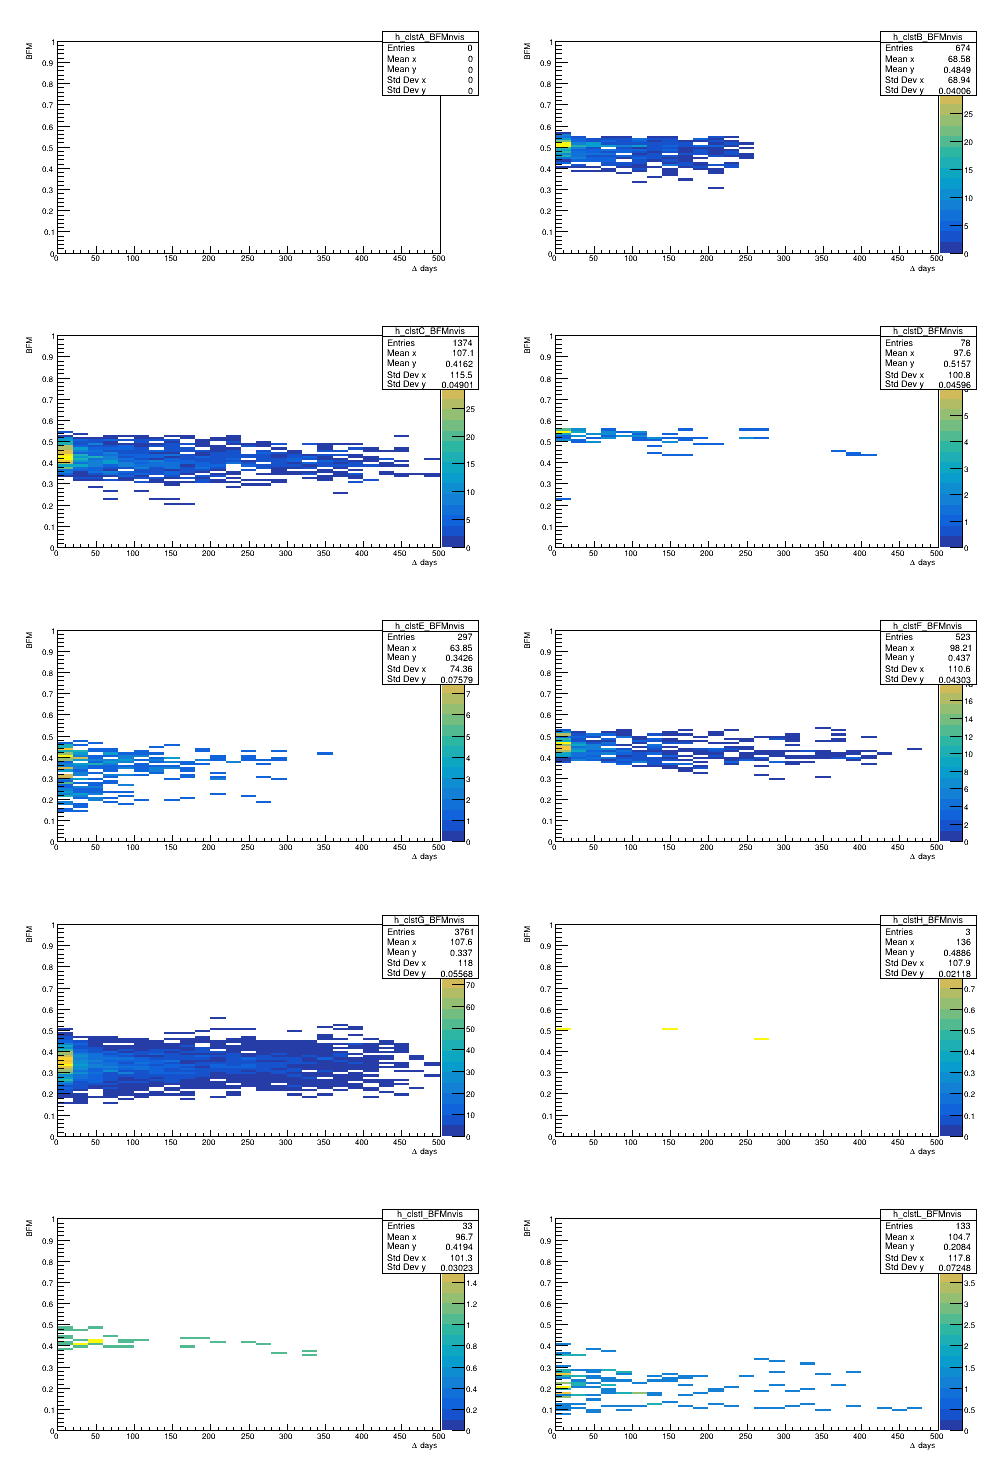

In [21]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_BFMnvis.Draw("COLZ")
c1.cd(2)
h_clstB_BFMnvis.Draw("COLZ")
c1.cd(3)
h_clstC_BFMnvis.Draw("COLZ")
c1.cd(4)
h_clstD_BFMnvis.Draw("COLZ")
c1.cd(5)
h_clstE_BFMnvis.Draw("COLZ")
c1.cd(6)
h_clstF_BFMnvis.Draw("COLZ")
c1.cd(7)
h_clstG_BFMnvis.Draw("COLZ")
c1.cd(8)
h_clstH_BFMnvis.Draw("COLZ")
c1.cd(9)
h_clstI_BFMnvis.Draw("COLZ")
c1.cd(10)
h_clstL_BFMnvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      18.7245
NDf                       =           11
p0                        =     0.496675   +/-   0.00185273  
p1                        = -0.000152721   +/-   2.27765e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =       52.102
NDf                       =           22
p0                        =     0.427712   +/-   0.00163755  
p1                        = -9.05731e-05   +/-   1.02518e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      55.9552
NDf                       =           11
p0                        =     0.549341   +/-   0.00314829  
p1                        = -0.000265574   +/-   1.35246e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      26.9324
NDf                       =           12
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


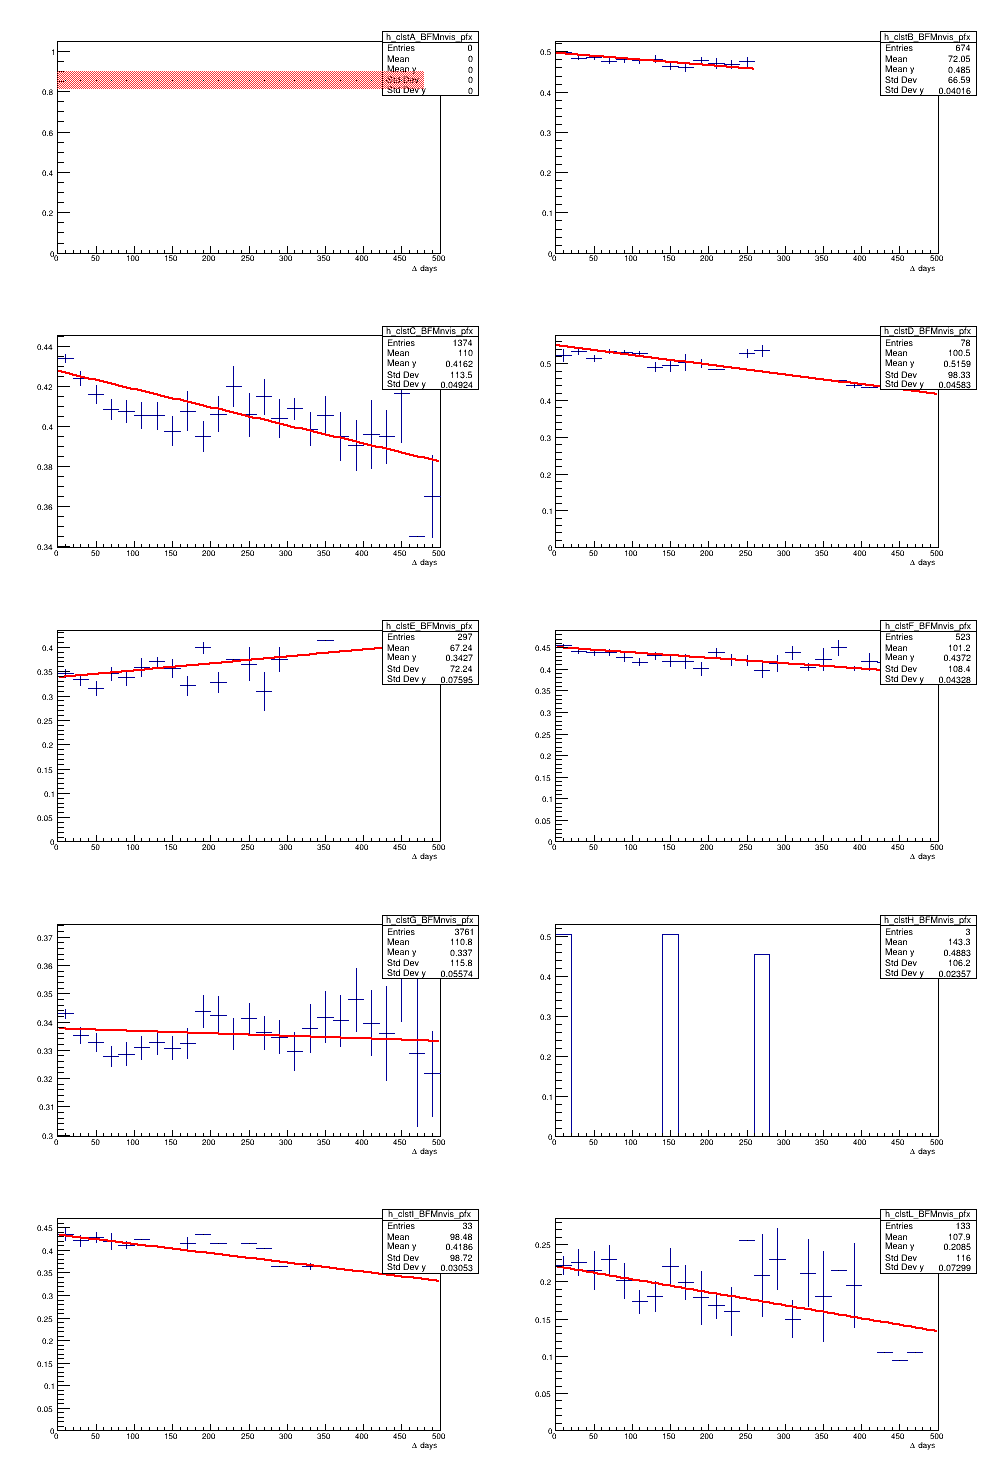

In [22]:
%jsroot off
h_ref = ROOT.TH1F('', '; n. visita; BFM', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (0.9 + 0.81)/2)
    h_ref.SetBinError(i, (0.9 - 0.81)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_BFMnvis.ProfileX().Draw()
h_clstA_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_BFMnvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_BFMnvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_BFMnvis.ProfileX().Draw()
h_clstC_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_BFMnvis.ProfileX().Draw()
h_clstD_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_BFMnvis.ProfileX().Draw()
h_clstE_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_BFMnvis.ProfileX().Draw()
h_clstF_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_BFMnvis.ProfileX().Draw()
h_clstG_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_BFMnvis.ProfileX().Draw()
h_clstH_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_BFMnvis.ProfileX().Draw()
h_clstI_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_BFMnvis.ProfileX().Draw("SAME")
h_clstL_BFMnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con ICW medio di riferimento

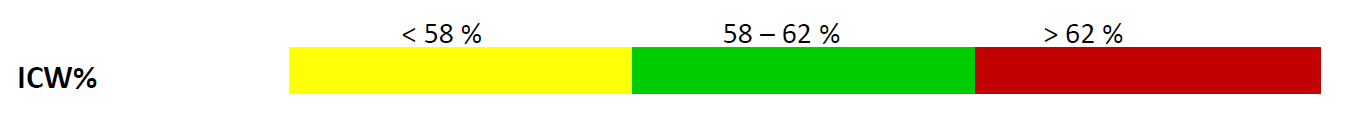

In [23]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0
ymax = 1
ybin = 100

xlabel = '#Delta days'

h_clstA_ICWnvis = ROOT.TH2F('h_clstA_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_ICWnvis = ROOT.TH2F('h_clstB_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_ICWnvis = ROOT.TH2F('h_clstC_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_ICWnvis = ROOT.TH2F('h_clstD_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_ICWnvis = ROOT.TH2F('h_clstE_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_ICWnvis = ROOT.TH2F('h_clstF_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_ICWnvis = ROOT.TH2F('h_clstG_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_ICWnvis = ROOT.TH2F('h_clstH_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_ICWnvis = ROOT.TH2F('h_clstI_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_ICWnvis = ROOT.TH2F('h_clstL_ICWnvis', '; ' + xlabel + '; ICW', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 3):
        h_clstC_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 4):
        h_clstD_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 5):
        h_clstE_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 6):
        h_clstF_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 7):
        h_clstG_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 8):
        h_clstH_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 9):
        h_clstI_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)
    if(cluster == 10):
        h_clstL_ICWnvis.Fill( tree.DeltaDays, tree.ICW/tree.TBW)


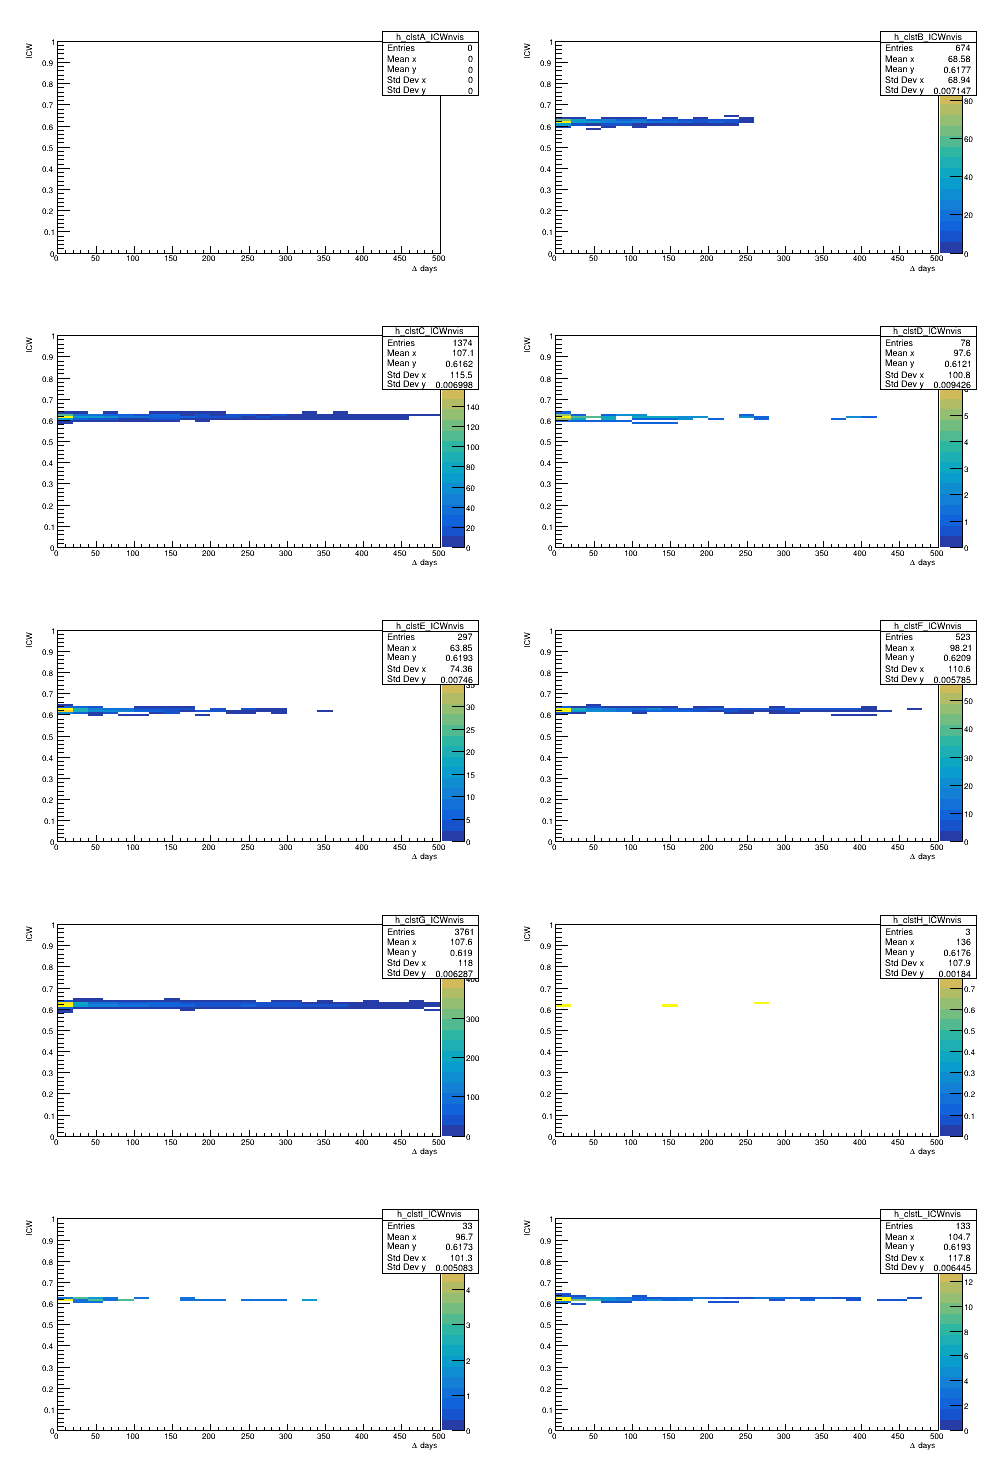

In [24]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_ICWnvis.Draw("COLZ")
c1.cd(2)
h_clstB_ICWnvis.Draw("COLZ")
c1.cd(3)
h_clstC_ICWnvis.Draw("COLZ")
c1.cd(4)
h_clstD_ICWnvis.Draw("COLZ")
c1.cd(5)
h_clstE_ICWnvis.Draw("COLZ")
c1.cd(6)
h_clstF_ICWnvis.Draw("COLZ")
c1.cd(7)
h_clstG_ICWnvis.Draw("COLZ")
c1.cd(8)
h_clstH_ICWnvis.Draw("COLZ")
c1.cd(9)
h_clstI_ICWnvis.Draw("COLZ")
c1.cd(10)
h_clstL_ICWnvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      9.40327
NDf                       =           11
p0                        =     0.617118   +/-   0.00043202  
p1                        =  5.91534e-06   +/-   4.24921e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      20.6689
NDf                       =           21
p0                        =     0.616013   +/-   0.000284659 
p1                        =  1.95726e-06   +/-   1.79726e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      11.0016
NDf                       =            9
p0                        =     0.611931   +/-   0.00153737  
p1                        =  2.73171e-06   +/-   1.06273e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      20.1017
NDf                       =           13
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


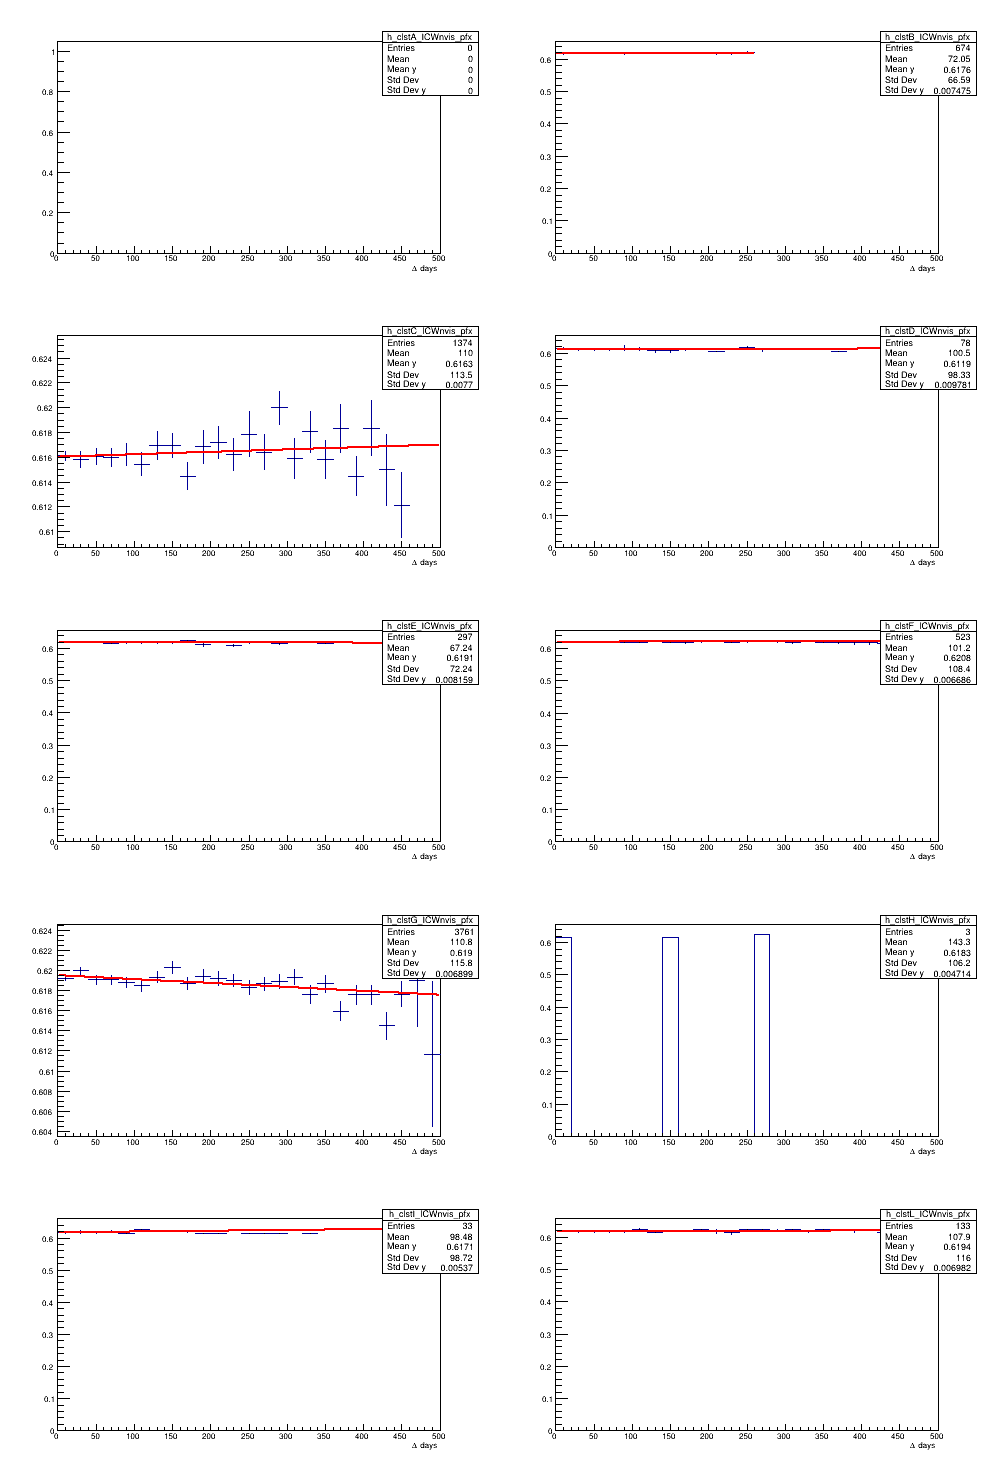

In [25]:
h_ref = ROOT.TH1F('', '; n. visita; ICW', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (62 + 58)/2)
    h_ref.SetBinError(i, (62 - 58)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_ICWnvis.ProfileX().Draw()
h_clstA_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_ICWnvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_ICWnvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_ICWnvis.ProfileX().Draw()
h_clstC_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_ICWnvis.ProfileX().Draw()
h_clstD_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_ICWnvis.ProfileX().Draw()
h_clstE_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_ICWnvis.ProfileX().Draw()
h_clstF_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_ICWnvis.ProfileX().Draw()
h_clstG_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_ICWnvis.ProfileX().Draw()
h_clstH_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_ICWnvis.ProfileX().Draw()
h_clstI_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_ICWnvis.ProfileX().Draw("SAME")
h_clstL_ICWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con ECW medio di riferimento

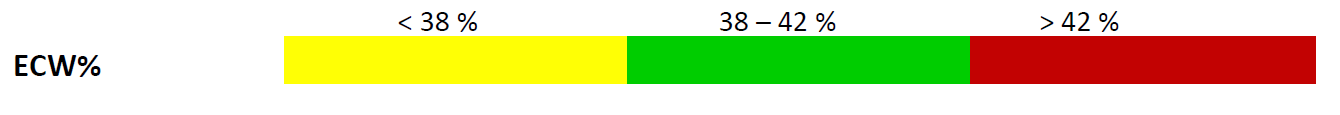

In [26]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0
ymax = 1
ybin = 100

xlabel = '#Delta days'

h_clstA_ECWnvis = ROOT.TH2F('h_clstA_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_ECWnvis = ROOT.TH2F('h_clstB_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_ECWnvis = ROOT.TH2F('h_clstC_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_ECWnvis = ROOT.TH2F('h_clstD_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_ECWnvis = ROOT.TH2F('h_clstE_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_ECWnvis = ROOT.TH2F('h_clstF_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_ECWnvis = ROOT.TH2F('h_clstG_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_ECWnvis = ROOT.TH2F('h_clstH_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_ECWnvis = ROOT.TH2F('h_clstI_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_ECWnvis = ROOT.TH2F('h_clstL_ECWnvis', '; ' + xlabel + '; ECW', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 3):
        h_clstC_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 4):
        h_clstD_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 5):
        h_clstE_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 6):
        h_clstF_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 7):
        h_clstG_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 8):
        h_clstH_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 9):
        h_clstI_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)
    if(cluster == 10):
        h_clstL_ECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.TBW)


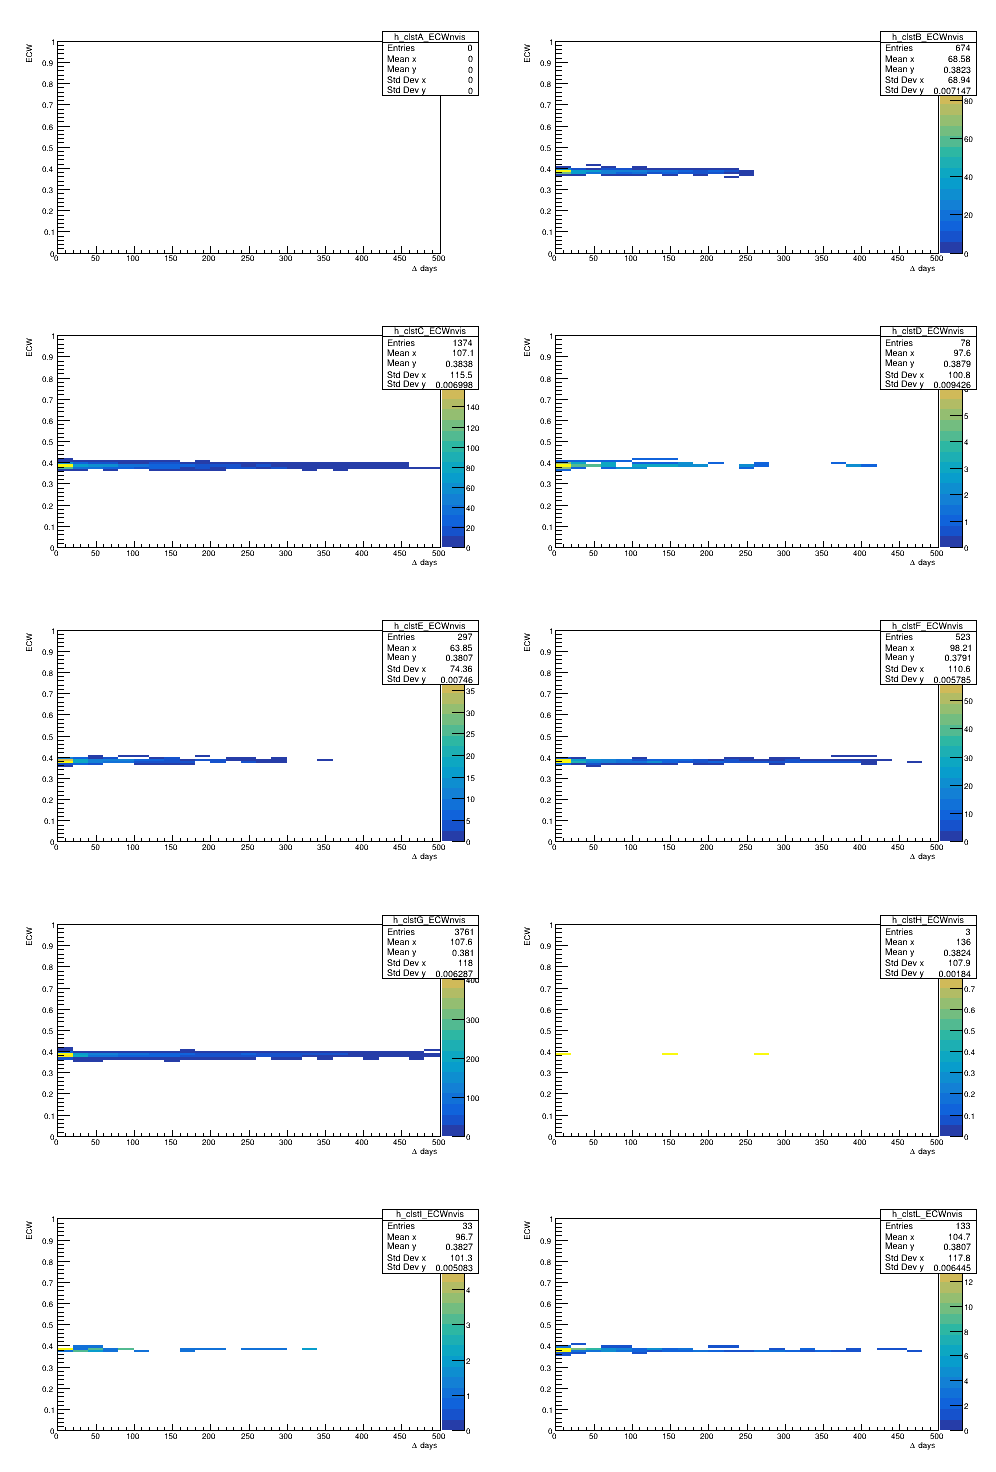

In [27]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_ECWnvis.Draw("COLZ")
c1.cd(2)
h_clstB_ECWnvis.Draw("COLZ")
c1.cd(3)
h_clstC_ECWnvis.Draw("COLZ")
c1.cd(4)
h_clstD_ECWnvis.Draw("COLZ")
c1.cd(5)
h_clstE_ECWnvis.Draw("COLZ")
c1.cd(6)
h_clstF_ECWnvis.Draw("COLZ")
c1.cd(7)
h_clstG_ECWnvis.Draw("COLZ")
c1.cd(8)
h_clstH_ECWnvis.Draw("COLZ")
c1.cd(9)
h_clstI_ECWnvis.Draw("COLZ")
c1.cd(10)
h_clstL_ECWnvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      10.3944
NDf                       =           11
p0                        =     0.382875   +/-   0.000435186 
p1                        =  -5.5569e-06   +/-   4.26236e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      20.8105
NDf                       =           21
p0                        =     0.384001   +/-   0.000283758 
p1                        = -1.98292e-06   +/-   1.79483e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      11.0016
NDf                       =            9
p0                        =     0.388069   +/-   0.00153737  
p1                        = -2.73171e-06   +/-   1.06273e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      20.1022
NDf                       =           13
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


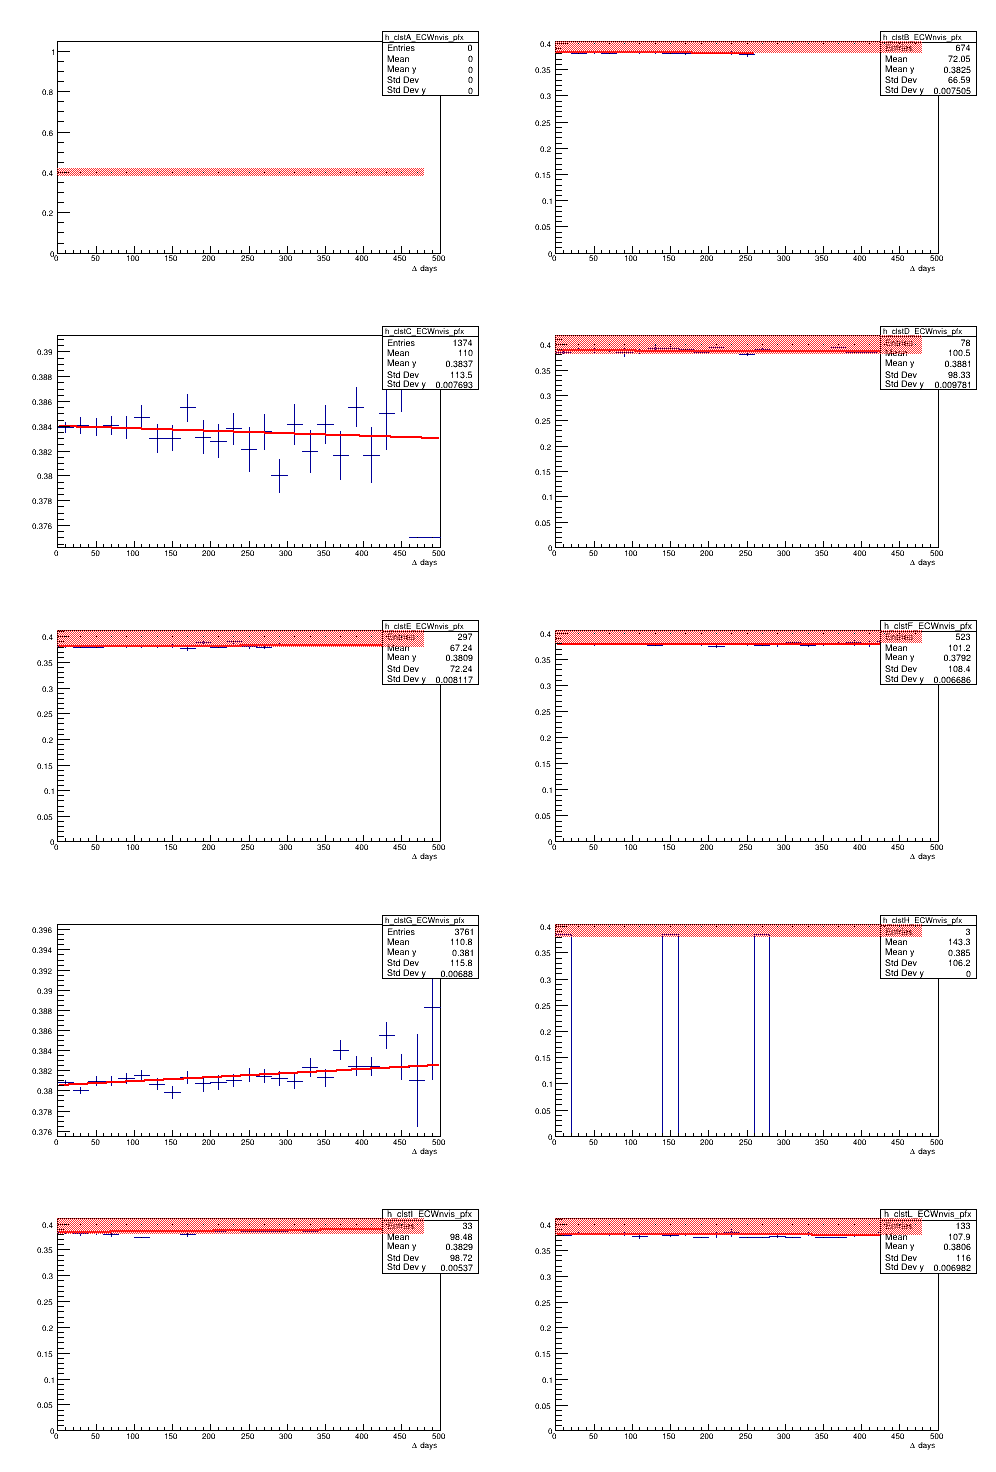

In [28]:
h_ref = ROOT.TH1F('', '; n. visita; ECW', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (.42 + .38)/2)
    h_ref.SetBinError(i, (.42 - .38)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_ECWnvis.ProfileX().Draw()
h_clstA_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_ECWnvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_ECWnvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_ECWnvis.ProfileX().Draw()
h_clstC_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_ECWnvis.ProfileX().Draw()
h_clstD_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_ECWnvis.ProfileX().Draw()
h_clstE_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_ECWnvis.ProfileX().Draw()
h_clstF_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_ECWnvis.ProfileX().Draw()
h_clstG_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_ECWnvis.ProfileX().Draw()
h_clstH_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_ECWnvis.ProfileX().Draw()
h_clstI_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_ECWnvis.ProfileX().Draw("SAME")
h_clstL_ECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con ECW/ICW medio di riferimento

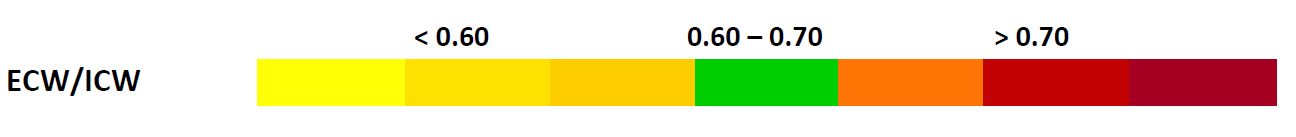

In [29]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0
ymax = 2
ybin = 100

xlabel = '#Delta days'

h_clstA_ICWECWnvis = ROOT.TH2F('h_clstA_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_ICWECWnvis = ROOT.TH2F('h_clstB_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_ICWECWnvis = ROOT.TH2F('h_clstC_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_ICWECWnvis = ROOT.TH2F('h_clstD_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_ICWECWnvis = ROOT.TH2F('h_clstE_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_ICWECWnvis = ROOT.TH2F('h_clstF_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_ICWECWnvis = ROOT.TH2F('h_clstG_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_ICWECWnvis = ROOT.TH2F('h_clstH_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_ICWECWnvis = ROOT.TH2F('h_clstI_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_ICWECWnvis = ROOT.TH2F('h_clstL_ICWECWnvis', '; ' + xlabel + '; ECW/ICW', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 3):
        h_clstC_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 4):
        h_clstD_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 5):
        h_clstE_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 6):
        h_clstF_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 7):
        h_clstG_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 8):
        h_clstH_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 9):
        h_clstI_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)
    if(cluster == 10):
        h_clstL_ICWECWnvis.Fill( tree.DeltaDays, tree.ECW/tree.ICW)


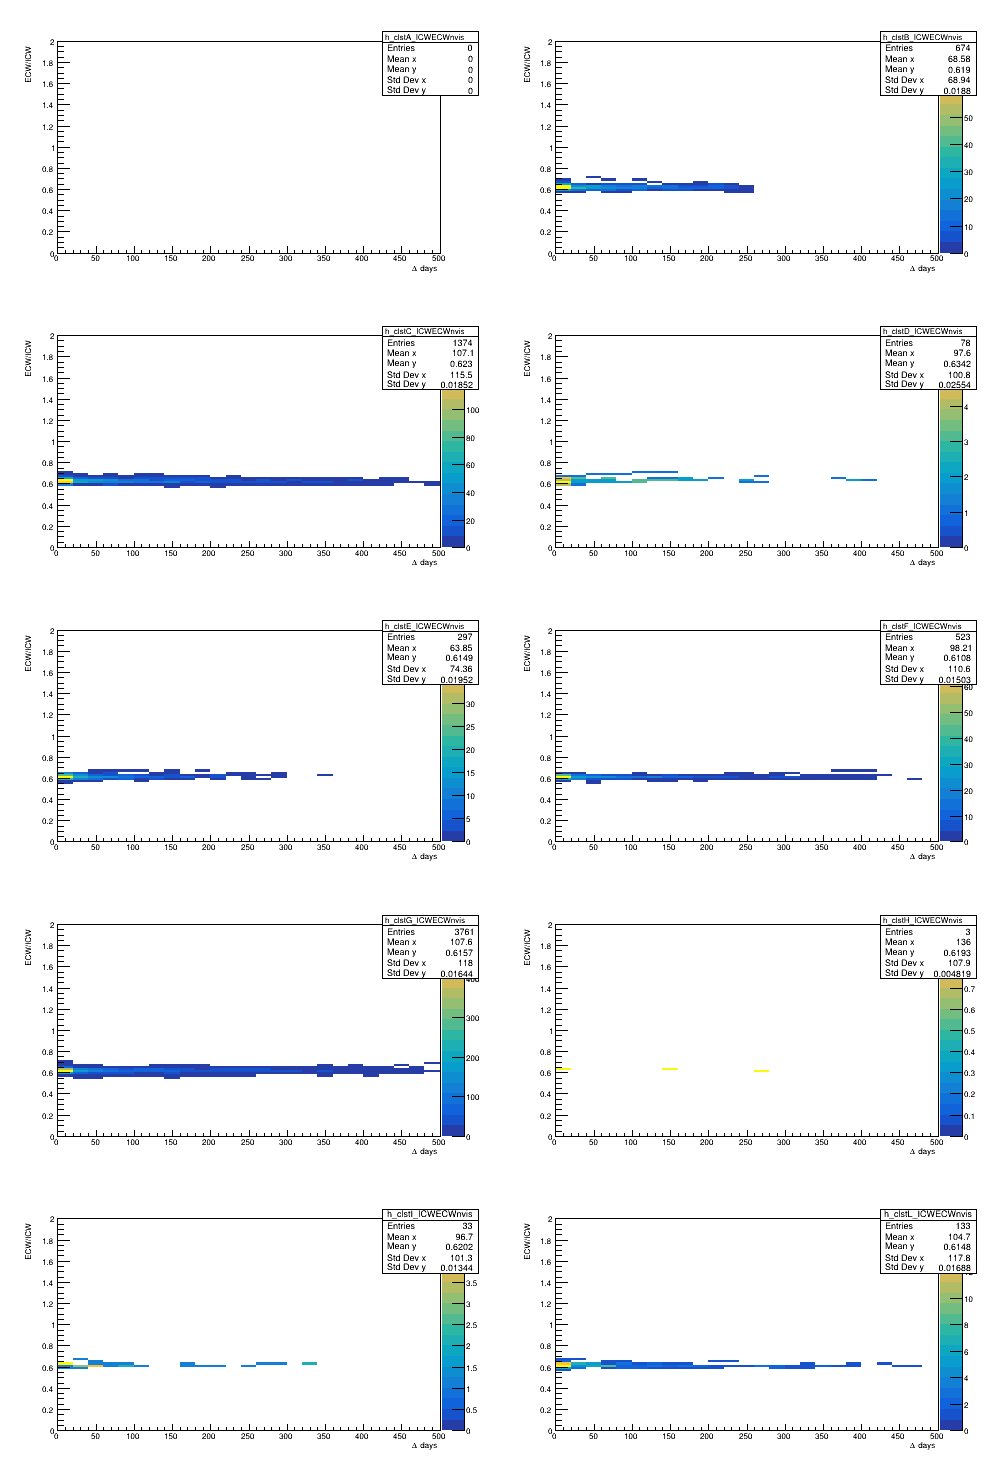

In [30]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_ICWECWnvis.Draw("COLZ")
c1.cd(2)
h_clstB_ICWECWnvis.Draw("COLZ")
c1.cd(3)
h_clstC_ICWECWnvis.Draw("COLZ")
c1.cd(4)
h_clstD_ICWECWnvis.Draw("COLZ")
c1.cd(5)
h_clstE_ICWECWnvis.Draw("COLZ")
c1.cd(6)
h_clstF_ICWECWnvis.Draw("COLZ")
c1.cd(7)
h_clstG_ICWECWnvis.Draw("COLZ")
c1.cd(8)
h_clstH_ICWECWnvis.Draw("COLZ")
c1.cd(9)
h_clstI_ICWECWnvis.Draw("COLZ")
c1.cd(10)
h_clstL_ICWECWnvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      14.0605
NDf                       =           11
p0                        =     0.620023   +/-   0.00117062  
p1                        = -1.04516e-05   +/-   1.12001e-05 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      28.2383
NDf                       =           22
p0                        =     0.624276   +/-   0.000693518 
p1                        = -1.08852e-05   +/-   4.14749e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      12.2498
NDf                       =            9
p0                        =     0.631222   +/-   0.00416218  
p1                        =   9.0367e-06   +/-   2.7322e-05  

****************************************
Minimizer is Linear / Migrad
Chi2                      =      20.2359
NDf                       =           13
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


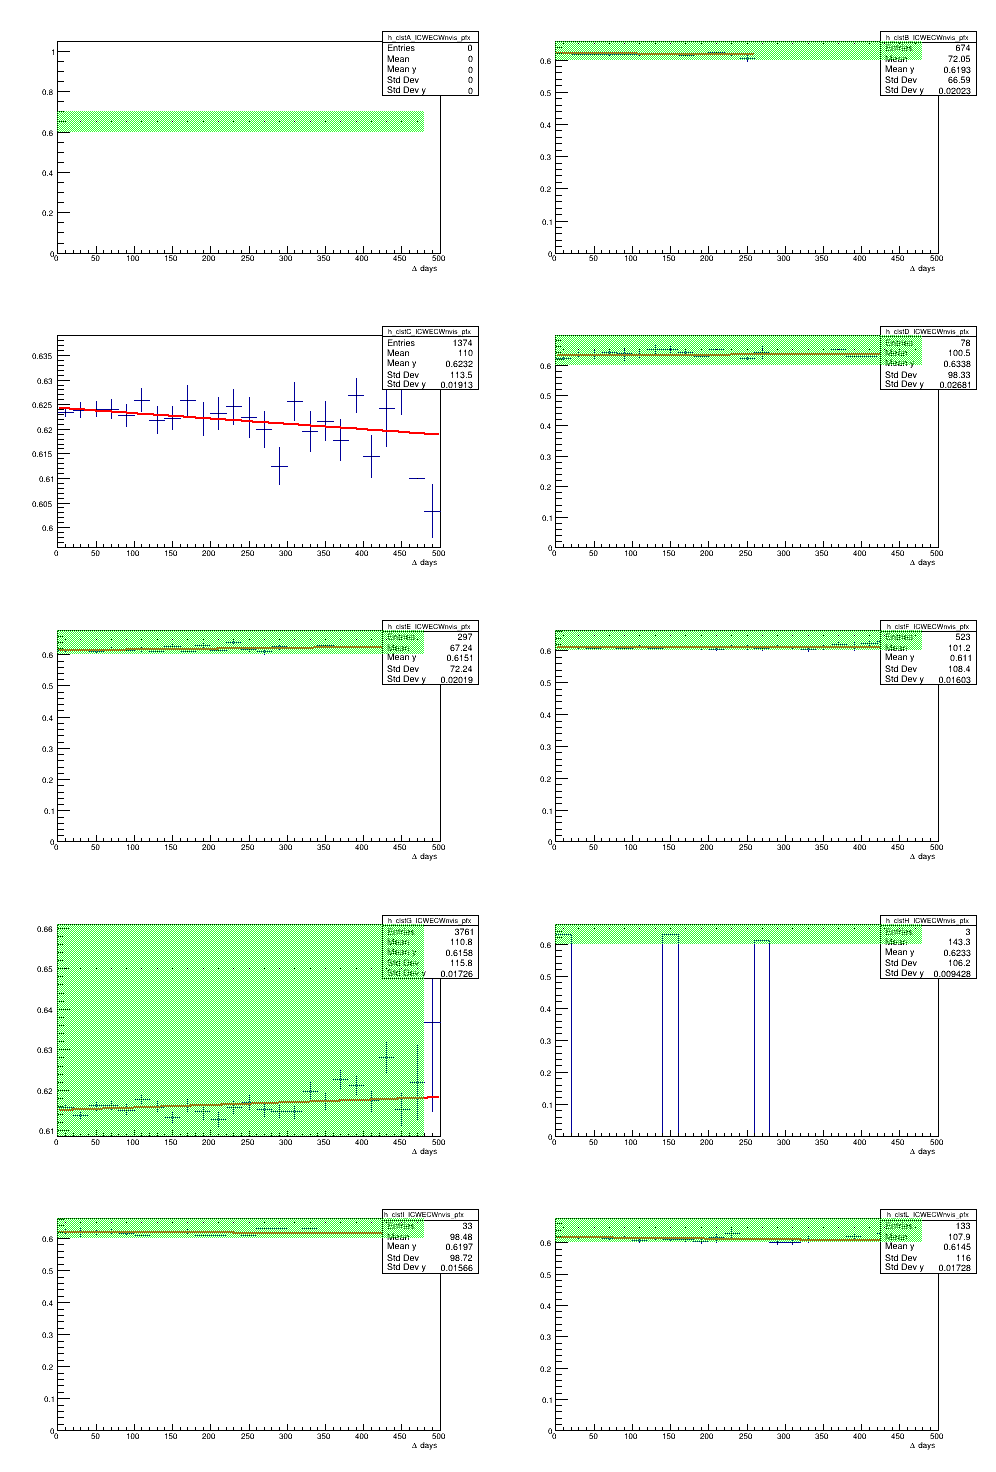

In [31]:
h_ref = ROOT.TH1F('', '; n. visita; ICWECW', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (0.7 + 0.6)/2)
    h_ref.SetBinError(i, (0.7 - 0.6)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kGreen-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_ICWECWnvis.ProfileX().Draw()
h_clstA_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_ICWECWnvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_ICWECWnvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_ICWECWnvis.ProfileX().Draw()
h_clstC_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_ICWECWnvis.ProfileX().Draw()
h_clstD_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_ICWECWnvis.ProfileX().Draw()
h_clstE_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_ICWECWnvis.ProfileX().Draw()
h_clstF_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_ICWECWnvis.ProfileX().Draw()
h_clstG_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_ICWECWnvis.ProfileX().Draw()
h_clstH_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_ICWECWnvis.ProfileX().Draw()
h_clstI_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_ICWECWnvis.ProfileX().Draw("SAME")
h_clstL_ICWECWnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con SMI medio di riferimento

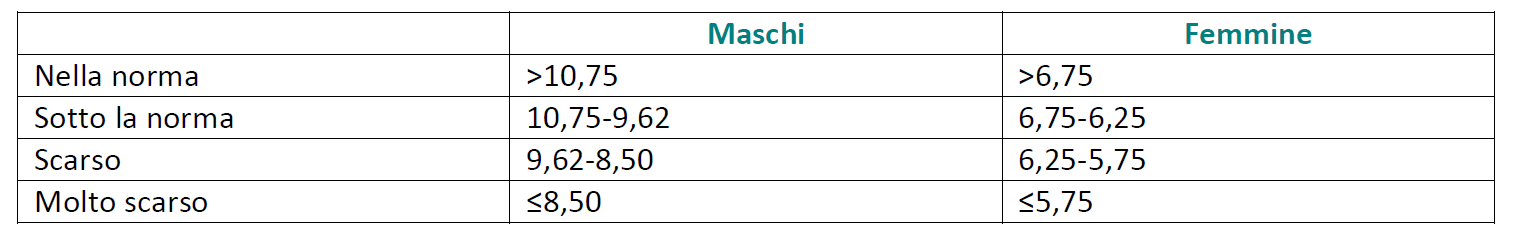

In [30]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0
ymax = 20
ybin = 100

xlabel = '#Delta days'

h_clstA_SMInvis = ROOT.TH2F('h_clstA_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_SMInvis = ROOT.TH2F('h_clstB_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_SMInvis = ROOT.TH2F('h_clstC_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_SMInvis = ROOT.TH2F('h_clstD_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_SMInvis = ROOT.TH2F('h_clstE_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_SMInvis = ROOT.TH2F('h_clstF_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_SMInvis = ROOT.TH2F('h_clstG_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_SMInvis = ROOT.TH2F('h_clstH_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_SMInvis = ROOT.TH2F('h_clstI_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_SMInvis = ROOT.TH2F('h_clstL_SMInvis', '; ' + xlabel + '; SMI', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 3):
        h_clstC_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 4):
        h_clstD_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 5):
        h_clstE_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 6):
        h_clstF_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 7):
        h_clstG_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 8):
        h_clstH_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 9):
        h_clstI_SMInvis.Fill( tree.DeltaDays, tree.SMI)
    if(cluster == 10):
        h_clstL_SMInvis.Fill( tree.DeltaDays, tree.SMI)


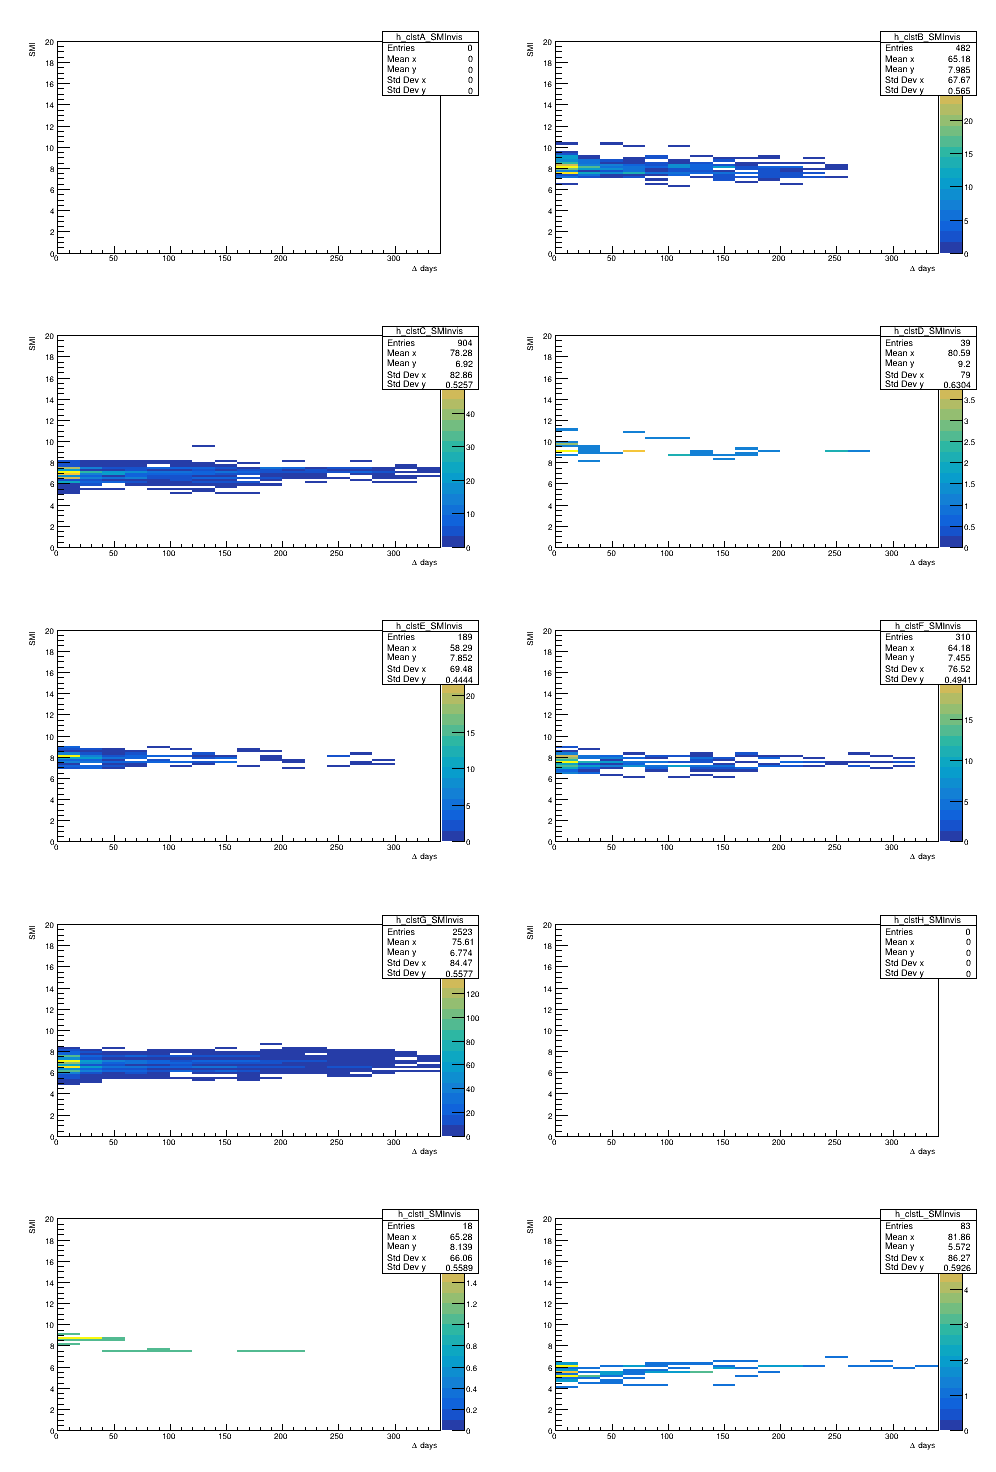

In [31]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_SMInvis.Draw("COLZ")
c1.cd(2)
h_clstB_SMInvis.Draw("COLZ")
c1.cd(3)
h_clstC_SMInvis.Draw("COLZ")
c1.cd(4)
h_clstD_SMInvis.Draw("COLZ")
c1.cd(5)
h_clstE_SMInvis.Draw("COLZ")
c1.cd(6)
h_clstF_SMInvis.Draw("COLZ")
c1.cd(7)
h_clstG_SMInvis.Draw("COLZ")
c1.cd(8)
h_clstH_SMInvis.Draw("COLZ")
c1.cd(9)
h_clstI_SMInvis.Draw("COLZ")
c1.cd(10)
h_clstL_SMInvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      9.81418
NDf                       =           11
p0                        =       8.1013   +/-   0.0363445   
p1                        =  -0.00169294   +/-   0.000380547 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      20.6999
NDf                       =           15
p0                        =      6.87317   +/-   0.0236933   
p1                        =  0.000861045   +/-   0.000175628 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      11.3996
NDf                       =            5
p0                        =      9.38834   +/-   0.144424    
p1                        =  -0.00385047   +/-   0.00113397  

****************************************
Minimizer is Linear / Migrad
Chi2                      =      13.9257
NDf                       =           12
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


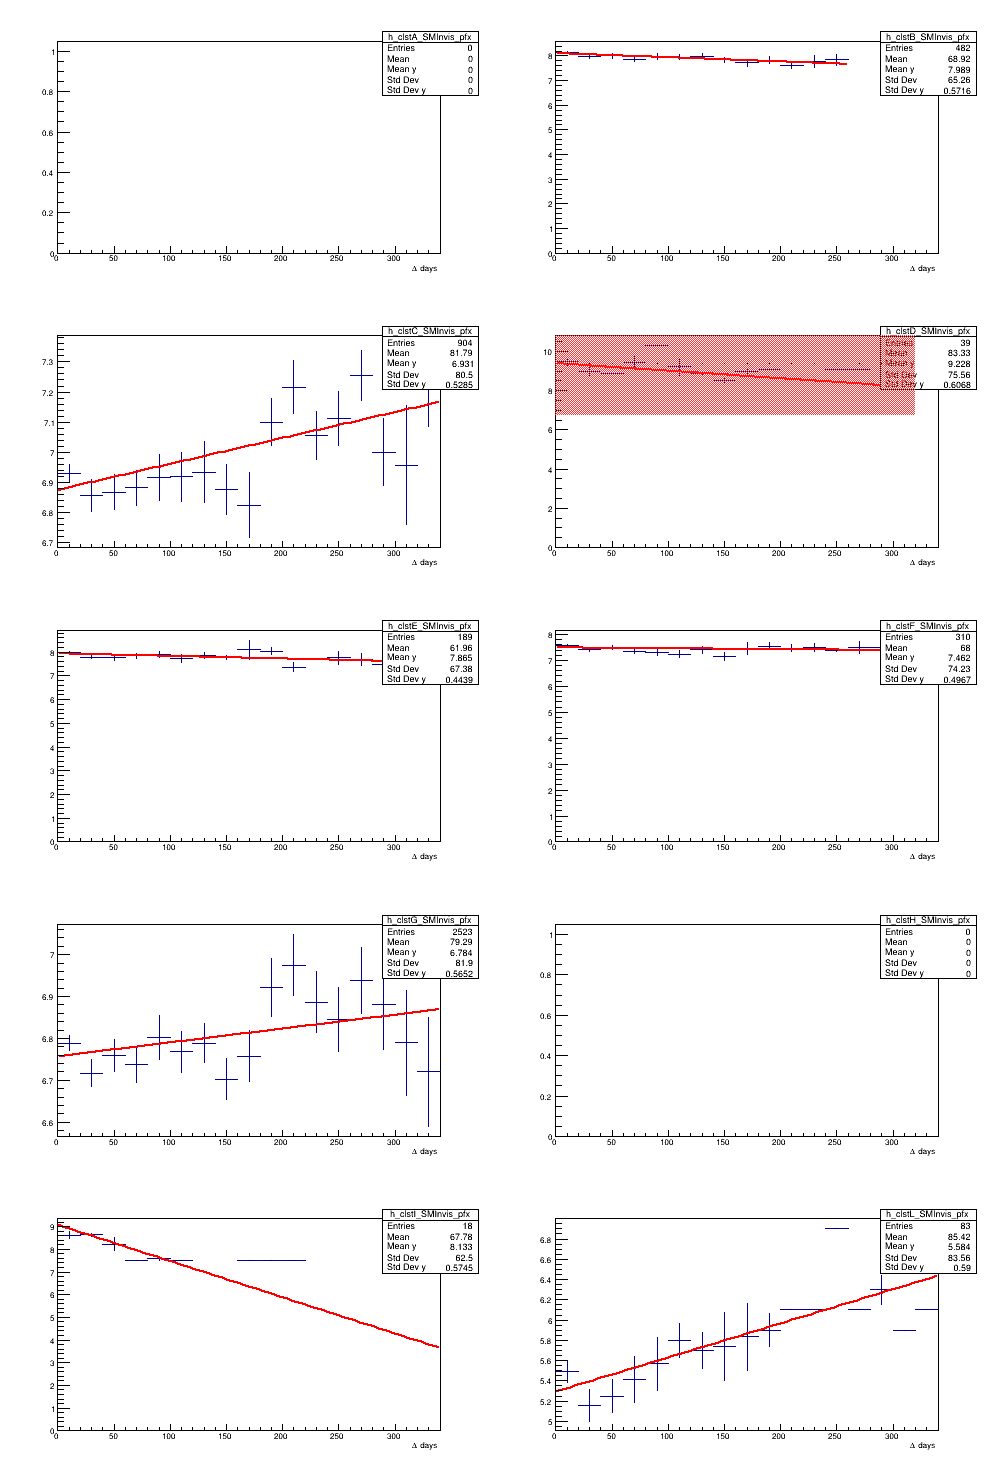

In [32]:
h_ref = ROOT.TH1F('', '; n. visita; SMI', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (12 + 6.75)/2)
    h_ref.SetBinError(i, (12 - 6.75)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_SMInvis.ProfileX().Draw()
h_clstA_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_SMInvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_SMInvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_SMInvis.ProfileX().Draw()
h_clstC_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_SMInvis.ProfileX().Draw()
h_clstD_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_SMInvis.ProfileX().Draw()
h_clstE_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_SMInvis.ProfileX().Draw()
h_clstF_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_SMInvis.ProfileX().Draw()
h_clstG_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_SMInvis.ProfileX().Draw()
h_clstH_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_SMInvis.ProfileX().Draw()
h_clstI_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_SMInvis.ProfileX().Draw("SAME")
h_clstL_SMInvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


# Indice di bontà con BMR medio di riferimento

In [33]:
xmin = 0
xmax = 500
xbin = 25

ymin = 0
ymax = 2000
ybin = 100

xlabel = '#Delta days'

h_clstA_BMRnvis = ROOT.TH2F('h_clstA_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstB_BMRnvis = ROOT.TH2F('h_clstB_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstC_BMRnvis = ROOT.TH2F('h_clstC_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstD_BMRnvis = ROOT.TH2F('h_clstD_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstE_BMRnvis = ROOT.TH2F('h_clstE_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstF_BMRnvis = ROOT.TH2F('h_clstF_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstG_BMRnvis = ROOT.TH2F('h_clstG_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstH_BMRnvis = ROOT.TH2F('h_clstH_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstI_BMRnvis = ROOT.TH2F('h_clstI_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)
h_clstL_BMRnvis = ROOT.TH2F('h_clstL_BMRnvis', '; ' + xlabel + '; BMR', xbin, xmin, xmax, ybin, ymin, ymax)

pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
    if(cluster == 1):
        h_clstA_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 2 and tree.DeltaDays<250):
        h_clstB_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 3):
        h_clstC_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 4):
        h_clstD_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 5):
        h_clstE_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 6):
        h_clstF_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 7):
        h_clstG_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 8):
        h_clstH_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 9):
        h_clstI_BMRnvis.Fill( tree.DeltaDays, tree.BMR)
    if(cluster == 10):
        h_clstL_BMRnvis.Fill( tree.DeltaDays, tree.BMR)


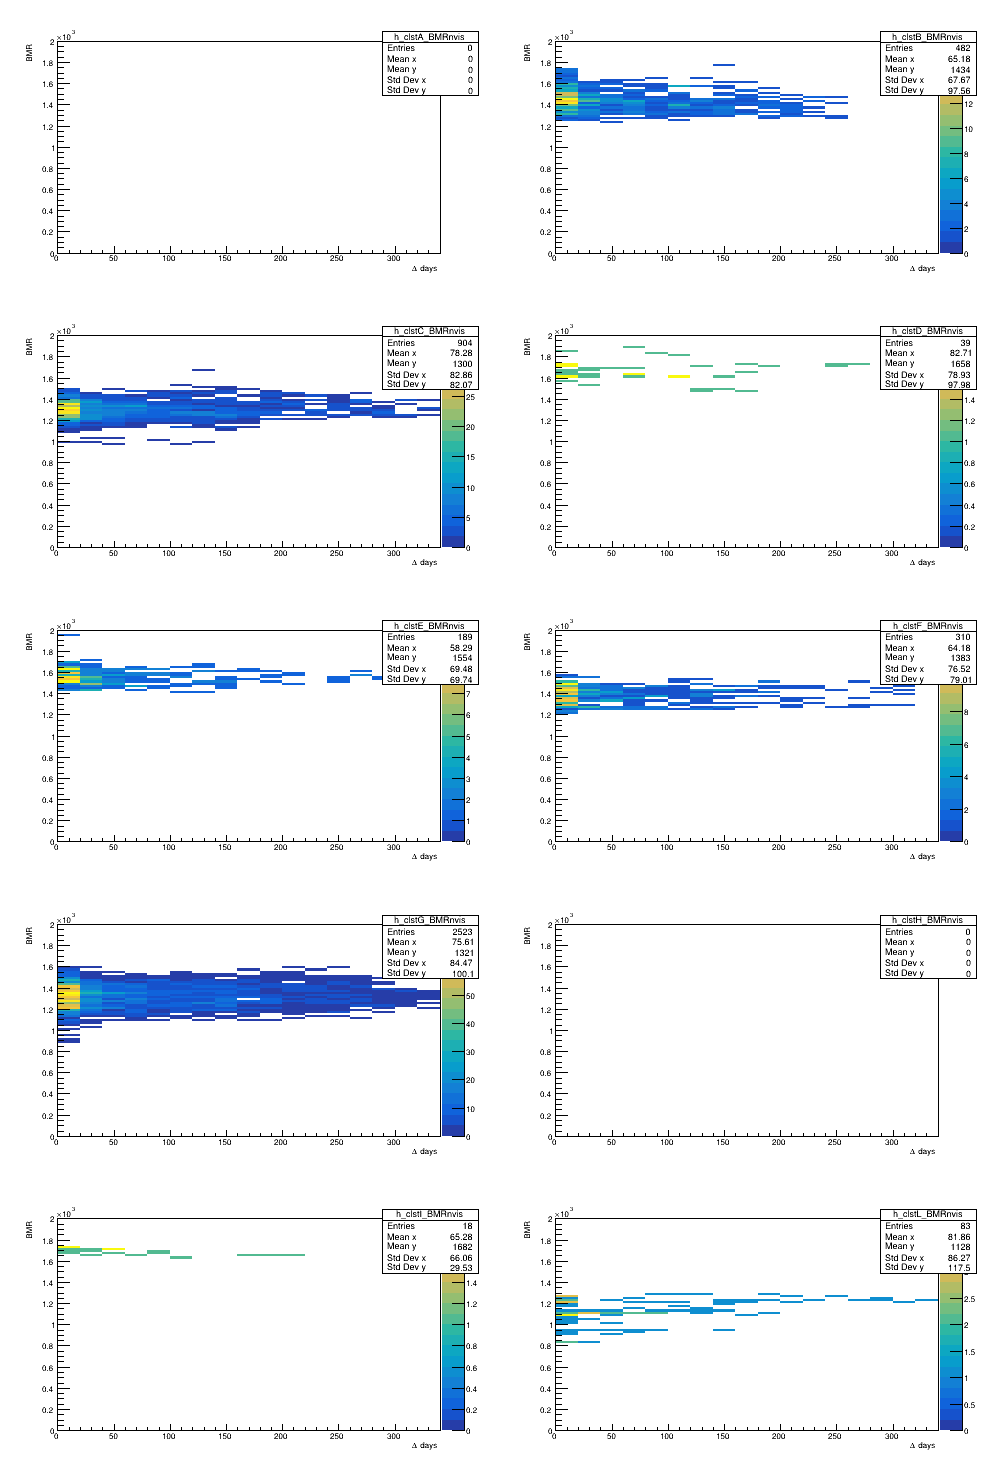

In [34]:
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.cd(1)
h_clstA_BMRnvis.Draw("COLZ")
c1.cd(2)
h_clstB_BMRnvis.Draw("COLZ")
c1.cd(3)
h_clstC_BMRnvis.Draw("COLZ")
c1.cd(4)
h_clstD_BMRnvis.Draw("COLZ")
c1.cd(5)
h_clstE_BMRnvis.Draw("COLZ")
c1.cd(6)
h_clstF_BMRnvis.Draw("COLZ")
c1.cd(7)
h_clstG_BMRnvis.Draw("COLZ")
c1.cd(8)
h_clstH_BMRnvis.Draw("COLZ")
c1.cd(9)
h_clstI_BMRnvis.Draw("COLZ")
c1.cd(10)
h_clstL_BMRnvis.Draw("COLZ")
c1.Draw()


****************************************
Minimizer is Linear / Migrad
Chi2                      =      11.9754
NDf                       =           11
p0                        =      1455.09   +/-   6.31286     
p1                        =    -0.337893   +/-   0.0567331   

****************************************
Minimizer is Linear / Migrad
Chi2                      =      31.9714
NDf                       =           15
p0                        =      1295.16   +/-   3.58401     
p1                        =    0.0677136   +/-   0.0255007   

****************************************
Minimizer is Linear / Migrad
Chi2                      =       19.605
NDf                       =            6
p0                        =      1638.48   +/-   16.7329     
p1                        =     0.311894   +/-   0.0745626   

****************************************
Minimizer is Linear / Migrad
Chi2                      =      31.8703
NDf                       =           12
p0              

Warning in <Fit>: Fit data is empty 
Warning in <Fit>: Fit data is empty 


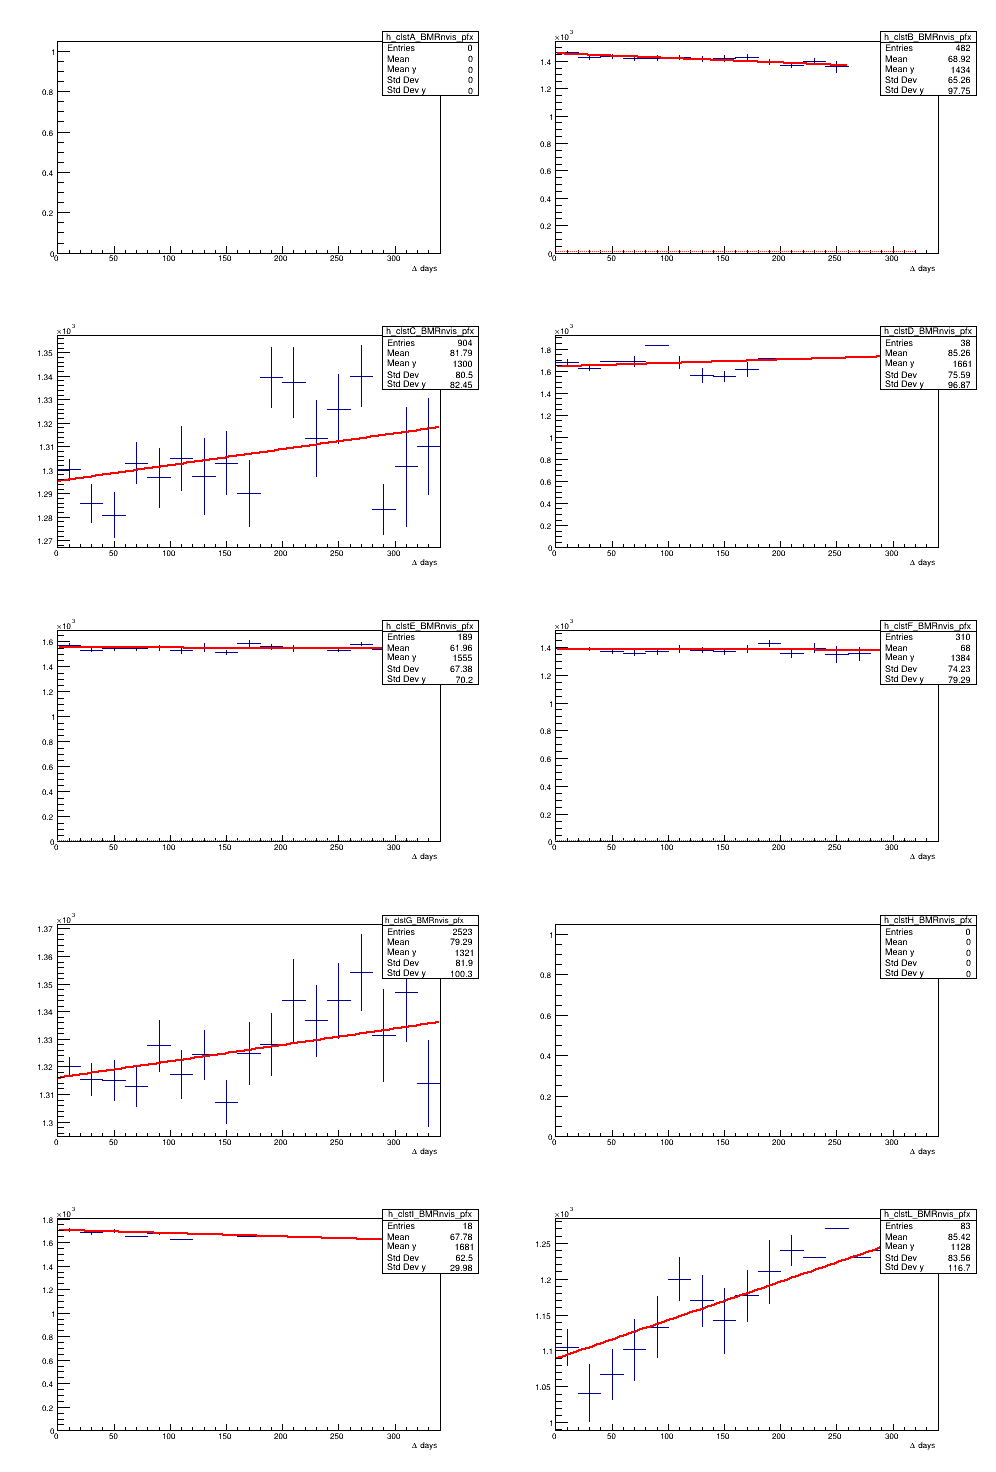

In [35]:
h_ref = ROOT.TH1F('', '; n. visita; BMR', xbin, xmin, xmax)
for i in range(xbin):
    h_ref.SetBinContent(i, (12 + 6.75)/2)
    h_ref.SetBinError(i, (12 - 6.75)/2)
    h_ref.SetLineWidth(100)
    h_ref.SetFillStyle(3001)
    h_ref.SetMarkerSize(0)
    h_ref.SetFillColor(ROOT.kRed-4)

    
c1 = ROOT.TCanvas('','', 0, 0, 1000, 1500)
c1.Divide(2,5)
c1.Draw()
c1.cd(1)
h_clstA_BMRnvis.ProfileX().Draw()
h_clstA_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(2)
h_clstB_BMRnvis.ProfileX().Draw()
f1 = ROOT.TF1("f1","pol1", 0, 260);
h_clstB_BMRnvis.ProfileX().Fit("f1", "R")
h_ref.Draw("e2same0")
c1.cd(3)
h_clstC_BMRnvis.ProfileX().Draw()
h_clstC_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(4)
h_clstD_BMRnvis.ProfileX().Draw()
h_clstD_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(5)
h_clstE_BMRnvis.ProfileX().Draw()
h_clstE_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(6)
h_clstF_BMRnvis.ProfileX().Draw()
h_clstF_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(7)
h_clstG_BMRnvis.ProfileX().Draw()
h_clstG_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(8)
h_clstH_BMRnvis.ProfileX().Draw()
h_clstH_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(9)
h_clstI_BMRnvis.ProfileX().Draw()
h_clstI_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")
c1.cd(10)
h_clstL_BMRnvis.ProfileX().Draw("SAME")
h_clstL_BMRnvis.ProfileX().Fit("pol1", )
h_ref.Draw("e2same0")


In [68]:
xmin = 0
xmax = 500
xbin = 25

ymin = 5
ymax = 65
ybin = 60

xlabel = '#Delta days'
h_clstA_BMImedio = ROOT.TH1F('h_clstA_BMImedio', '; ' + xlabel + '; BMI', 130, 5, 70)
h_clstA_BMIpend = ROOT.TH1F('h_clstA_BMIpend', '; ' + xlabel + '; BMI', 1000, -0.5, 0.5)

h_clstA_BMInvis = ROOT.TH2F('h_clstA_BMI', '; ' + xlabel + '; BMI', xbin, xmin, xmax, ybin, ymin, ymax)

j = 0
pre_id = -9999
for i in range(tree.GetEntries()):
    tree.GetEntry(i)
    if tree.Gender != gender:
        continue
    id = tree.Local_ID
    #print(h_clstA_BMInvis.GetEntries())
    if pre_id != -9999 and pre_id != id and cluster == 7 and len(xarray) > 1:
        graph = make_graph_err(len(xarray), xarray, exarray, yarray, eyarray, "g", "", "#Delta days", "BMI", ROOT.kBlue)
        #print(i)
        print(graph.GetN())
        #if(graph.GetN() < 2):
        #    continue
        #c1 = ROOT.TCanvas('','', 0, 0, 1600, 600)
        #c1.Divide(2,1)
        #c1.Draw()
        f1 = ROOT.TF1("f1","pol1", 0, xmax)
        graph.Fit("f1")
        if(f1.GetParameter(0) != 0):
            h_clstA_BMImedio.Fill(f1.GetParameter(0))
            h_clstA_BMIpend.Fill(f1.GetParameter(1))
        print(f1.GetParameter(0), f1.GetParameter(1))
        j += 1
    if pre_id != id:
        cluster = tree.cluster
        pre_id = id
        xarray = array('f', [])
        yarray = array('f', [])
        exarray = array('f', [])
        eyarray = array('f', [])
    if(cluster == 7 and pre_id == id):
        #h_clstA_BMInvis.Fill( tree.DeltaDays, tree.BMI)
        xarray.append(tree.DeltaDays)
        yarray.append(tree.BMI)
        exarray.append(0.5)
        eyarray.append(tree.BMI*0.1)


2
25.50001362817059 -0.028571282038734817
3
21.751627956338176 0.00495888770446111
9
27.240219431567112 -0.018127367102414076
19
28.287463247949688 -0.0024709318604560645
3
26.213317276010255 -0.009732577304745612
5
29.907989975147697 -0.017617371031481303
3
25.114669961927657 0.014100378404685728
7
24.2848649283518 -0.010402512543338157
4
25.70319997776821 -0.0006974045737138023
2
23.90045950941438 -0.019079204856574463
12
23.475554294448212 -0.00411391564361645
6
26.229079273008356 -0.0051474172965197155
14
27.527586908859984 -0.00023379142335395358
6
30.714063797882865 -0.0031604539539524853
2
30.20003343529179 -0.05624908617461656
2
26.999999808664754 0.003667482499924475
5
29.180877922454705 -0.022427761421684986
10
23.450372138786054 0.0015049238475837291
2
24.800476552032546 -0.01908041009155514
4
24.793049314975427 -0.024443992571593555
2
29.300744558752967 -0.07005382805791494
6
30.24989694506232 0.0001656781761280177
4
26.890676654531873 -0.013485781707987584
7
30.25574543749

12
29.397538688843238 0.0005136438448096644
4
20.88428968450325 -0.020835555372105824
6
24.600571938028402 0.0066476259959868415
2
20.900076173404923 -0.007145058935656503
11
24.00770615539125 -0.008172029608312164
4
21.219069573500004 -0.006282742355903474
2
25.500014935430702 -0.03571416143268499
2
23.499221424409345 -0.02350373103865755
8
26.54989144784511 -0.0034187878895369068
2
27.199958897813186 0.013084805125941231
4
23.080354574226323 0.0008534659644793545
2
29.399998019227045 0.0060975725971529286
7
25.043445505723405 -0.004428261342320346
2
27.8000283700543 -0.06874901092980511
8
26.101291305640633 -0.0019192293394708682
8
23.867627191115304 0.0008317456351949473
3
30.59839599886353 -0.003353378850586312
6
25.94316017634572 0.01271297381181979
5
24.94958259912538 -0.024525129771059362
6
22.03724630225513 -0.012922933025391705
10
27.804421194203176 -0.016916262936728224
2
25.20065321991778 -0.020047833159554253
7
29.699206572750207 -0.017817655737928043
5
31.969254582030878 -

23.101471755011158 -0.0060184054053508546
3
22.167510061086613 -0.02250602638103919
8
27.896828602371876 0.001366161633361937
14
29.936237349016267 0.004980370134695507
2
21.90016634072662 -0.024005670996264113
7
28.244007614197795 -0.015699869515461234
6
22.984908440939847 0.0001410233789180483
2
27.700000649823895 0.0019108276437871667
2
24.699996976201383 -0.007771986881683909
6
23.19850402771217 -0.02067203597270718
9
27.819613409794968 0.001774485051921538
8
29.436352888506285 -0.028587001633002783
6
27.945735843083057 0.00575145706678174
3
30.411201489378914 -0.012689653684800482
7
28.02895964499596 -0.0020616410991412867
5
24.441466877862403 -0.003755515628652099
7
28.94348297334804 -0.011919500114842914
5
27.67561754278776 -0.00770127725487173
2
29.80056652758979 -0.05718143316316918
11
25.07019328406861 -0.00390570538895185
3
22.705651430003932 -0.024527734966951195
3
23.917900499898522 -0.028731828867162364
2
30.10143538201083 -0.011232935506555153
10
29.247008553622067 0.001

Warning in <TFile::Append>: Replacing existing TH1: h_clstA_BMImedio (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_clstA_BMIpend (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_clstA_BMI (Potential memory leak).


In [70]:

print(j)

661


In [71]:
%jsroot on
c1 = ROOT.TCanvas('','', 0, 0, 1600, 600)
c1.Divide(2,1)
c1.Draw()
c1.cd(1)
h_clstA_BMImedio.Draw()
c1.cd(2)
h_clstA_BMIpend.Draw()